# function

In [ ]:
#import robust scaler
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
#import one hot encoder
from sklearn.preprocessing import OneHotEncoder

class PreProcessor1:
    def __init__(self):
        
        self.status = 'train'
        self.scaler = RobustScaler()
        self.version = '4.1 lackOfFrango'
        self.encoder = OneHotEncoder()
        self.max_col_onehot = 5
        
        self.date_cols = []
        self.desc_cols = []
        self.code_cols = []
        self.casting_methods = []
        self.casting_list = [
    ('Age at Injury',                       'Int64'),
    ('Average Weekly Wage',                 'float64'),
    # ('WCB Decision',                        'remove'),
    ('Alternative Dispute Resolution',      'string-U-nan'),
    ('District Name',                       'none'),
    ('Carrier Name',                        'string'),
    ('IME-4 Count',                         'Int64'),
    ('COVID-19 Indicator',                  'string'),
    ('Number of Dependents',                'Int64'),
    ('Carrier Type',                         '.str[:2]'),
    ('Medical Fee Region',                   'string'),
    ('County of Injury',                    'string'),
    ('Agreement Reached',                   'Int64'),
    ('Attorney/Representative',             'string'),
    ('Birth Year',                          'Int64'),
    ('Gender',                              'string'),
    ('Zip Code',                            '.str[0:5]'),
]
        self.casted_cols = []
        self.transformation_list = [
    ('Age at Injury',                   'none',             '-'),
    ('Average Weekly Wage',             'log',              'log_Average Weekly Wage'),
    # ('WCB Decision',                    'none',             '-'),
    ('Alternative Dispute Resolution',  'dummy-YN',         'Alternative Dispute Resolution'),
    ('District Name',                   'none',             '-'),
    ('Carrier Name',                    'none',             '-'),
    ('IME-4 Count',                     'none',             '-'),
    ('COVID-19 Indicator',              'dummy-YN',         'COVID-19 Indicator'),
    ('Number of Dependents',            'none',             '-'),
    ('Carrier Type',                    'oneHot',           '-OneHot'),
    ('Carrier Type',                    'freq_encode',      'fe_Carrier Type'),
    ('Medical Fee Region',              'oneHot',           '-oneHot'),
    ('Medical Fee Region',              'freq_encode',      'fe_Medical Fee Region'),
    ('County of Injury',                'oneHot',           '-oneHot'),
    ('County of Injury',                'freq_encode',      'fe_County of Injury'),
    ('Agreement Reached',               'none',             '-oneHot'),
    ('Attorney/Representative',         'dummy-YN',         'Attorney/Representative'),
    ('Birth Year',                      'subtract_1900',    'Age'),
    ('Gender',                          'oneHot',           '-oneHot'),
]     
        self.transformed_cols = []
        self.fillna_list = []
        
        self.sclaing_list = [   ('Carrier Type',                     0),
                                ('Zip Code',                         0),
                                ('log_Average Weekly Wage',          1),
                                ('Alternative Dispute Resolution',   0),
                                ('COVID-19 Indicator',               0),
                                ('fe_Carrier Type',                  1),
                                ('fe_Medical Fee Region',            1),
                                ('fe_County of Injury',              1),
                                ('Attorney/Representative',          0),
                                ('Age',                              1),
                                ('Assembly Month',                   1),
                                ('Assembly Year',                    1),
                                ('C-3 Month',                        1),
                                ('C-3 Year',                         1),
                                ('Accident Month',                   1),
                                ('Accident Year',                    1),
                                ('C-2 Month',                        1),
                                ('C-2 Year',                         1),
                                ('First Hearing Month',              0),
                                ('First Hearing Year',               0),
                                ('fe_WCIO Part Of Body Code',        1),
                                ('fe_Industry Code',                 1),
                                ('fe_WCIO Nature of Injury Code',    1),
                                ('fe_Zip Code',                      1),
                                ('fe_WCIO Cause of Injury Code',     1),
                                ('WCIO Part Of Body Code',           1),
                                ('Industry Code',                    1),
                                ('WCIO Nature of Injury Code',       1),
                                ('Gender_U',                         0),
                                ('Gender_X',                         0),
                                ('IME-4 Count',                      1),
                                ('Age at Injury',                    1),
                                ('District Name',                    0),
                                ('Average Weekly Wage',              1),
                                ('Medical Fee Region',               0),
                                ('Number of Dependents',             1),
                                ('Carrier Name',                     0),
                                ('Gender_F',                         0),
                                ('Agreement Reached',                0),
                                ('Gender',                           0),
                                ('Birth Year',                       1),
                                ('WCB Decision',                     0),
                                ('Gender_M',                         0),
                                ('WCIO Cause of Injury Code',        1),
                                ('County of Injury',                 0)]
        
        self.freq = []
        
    def appeend_freq_list(self, freq, col):
        self.freq.append((freq, col))


# ------------------------ internal functions
    def update_status(self, status):
        if status in ['train', 'valid', 'test']:
            self.status = status
        else:  
            print('Unknown status')
    
    def __str__(self):
        return (f"PreProcessor1: {self.status}" +
            f"scaler: {self.scaler}" +
                f"version: {self.version}")
        
        
       
        
# ------------------------casting part
        
        
    def update_casted_cols(self):     
        self.casted_cols = [col for col, method in self.casting_list]

    def update_casting_methods(self):
        self.casting_methods = [method for col, method in self.casting_list]

    def set_castings(self,df):
        df_cols = df.columns
        columns_to_be_casted = set(df_cols) - set(self.casted_cols)
    
        date_cols = []
        date_cols.extend([x for x in df_cols if 'Date' in x])
        for col in date_cols:
            self.append_casting(col, 'string')
        columns_to_be_casted = columns_to_be_casted - set(date_cols)
    
        desc_cols = []
        desc_cols.extend([x for x in df_cols if 'Description' in x])
        for col in desc_cols:
            self.append_casting(col, 'remove')
        columns_to_be_casted = columns_to_be_casted - set(desc_cols)
    
        code_cols = []
        code_cols.extend([x for x in df_cols if 'Code' in x])
        for col in code_cols:
            self.append_casting(col, 'Int64')
        columns_to_be_casted = columns_to_be_casted - set(code_cols)
    
        if len(columns_to_be_casted) > 0:
            print ('Columns that are not casted:')
            for col in columns_to_be_casted:
                try:
                    print (f'-{col}: {df[col].dtype}')
                except Exception as e: 
                    print(e)
                    print (f'-{col}: not found')

    def look_for_feature_casting(self,feature):
        i = 0
        for col, method in self.casting_list:
            if col == feature:
                print(f'-Column {col} is casted as {method} at index {i}')
                return method
            i += 1
        return None

    def update_casting_list(self,feature,method):
        i = 0
        for col, method in self.casting_list:
            if col == feature:
                self.casting_list[i] = (feature, method)
                return
            i += 1
        #print(f'-Column {feature} not found in casting list. Adding it now')
        self.append_casting(feature, method)
    
    def append_casting(self,feature,method):
        self.casting_list.append((feature, method))
    
        
    def cast_pipeline(self,df):
        for col, method in self.casting_list:
            if method == 'Int64':
                df = self.cast_Int64(df, col)
            elif method == 'float64':
                df = self.cast_Float64(df, col)
            elif method == 'string':
                df = self.cast_string(df, col)
            elif method == 'string-U-nan':
                df = self.cast_string_U_nan(df, col)
            elif method == '.str[:2]':
                df = self.cast_string_2(df, col)
                self.append_scaling(col, 0)
            elif method == 'datetime64':
                df = self.cast_datetime64(df, col)
                self.append_scaling(col, 0)
            elif method == 'remove':
                df = self.cast_remove(df, col)
            elif method == '.str[0:5]':
                df = self.cast_string_5(df, col)
                self.append_scaling(col, 0)
                
            elif method == 'none':
                pass
            else:
                print(f'Unknown method {method} for column {col}')
        return df

    def cast_Int64(self, df, col):
        try:
            df[col] = df[col].astype('Int64')
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')
        return df


    def cast_Float64(self, df, col):
        try:
            df[col] = df[col].astype('float64')
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')

        return df

    def cast_string(self, df, col):
        try:
            df[col] = df[col].astype('string')
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')

        return df

    def cast_string_U_nan(self, df, col):
        try:
            df[col] = df[col].astype('string')
            df[col] = df[col].replace('U', 'N')
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')
        return df

    def cast_string_2(self, df, col):
        try:
            df[col] = df[col].astype('string')
            df[col] = df[col].str[:2]
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')
        
        return df
    
    def cast_string_5(self, df, col):
        try:
            df[col] = df[col].astype('string')
            df[col] = df[col].fillna('00000')
            df[col] = df[col].str[:5]
            df[col] = df[col].apply(lambda x: int(x) if x.isnumeric() else 0)
            #df[col] = df[col].astype('string')
            
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')
        
        return df


    def cast_datetime64(self, df, col):
        try:
            df[col] = pd.to_datetime(df[col], errors='coerce')
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')
        
        return df


    def cast_remove(self, df, col):
        try:
            df.drop(columns=[col], inplace=True)
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')
        return df
    
    
# ---------------------------------encoding part

    def refresh_transformed_cols(self):
        self.transformed_cols = [new_col for col, method, new_col in self.transformation_list]
        if len(self.transformed_cols) > len(set(self.transformed_cols)):
            print('Warning: there are duplicates in the transformation list')
    
    def update_transformation_methods(self):
        self.transformation_methods = set([method for col, method, new_col in self.transformation_list])
        
    def look_for_feature_transformation(self,feature):
        i = 0
        result = []
        for col, method, new_col in self.transformation_list:   
            if col == feature:
                print(f'-Column {col} is transformed in {new_col} trough {method} at index {i}')
                result.append((method, new_col, i))
            i += 1
        print(f'-Column {feature} not found in transformation list')
        return result
    
    def look_for_new_col(self,feature):
        i = 0
        for col, method, new_col in self.transformation_list:
            if col == feature:
                print(f'-Column {new_col} is made from {method} at index {i}')
                return new_col
            i += 1
        print(f'-Column {feature} not found in transformation list')
        return None
    
    def append_transformation(self,feature,method,new_col):
        self.transformation_list.append((feature, method, new_col))


    def transformation_pipeline(self,df):
        onehot_list = []
        for col, method, new_col in self.transformation_list:
            if method == 'log':
                df = self.transformation_log(df, col, new_col)
            elif method == 'subtract_1900':
                df = self.transformation_subtract_1900(df, col, new_col)
            elif method == 'dummy-YN':
                df = self.transformation_dummy_yn(df, col, new_col)
            elif method == 'freq_encode':
                df = self.transformation_freq_encode(df, col, new_col)
            elif method == 'oneHot':
                if len(df[col].unique()) < self.max_col_onehot:
                    onehot_list.append(col)
                else:
                    print(f'Column {col} has too many unique values for oneHot encoding: {len(df[col].unique())}')
                    print(f'ony {self.max_col_onehot} allowed, change the parameter if needed')
                #df = self.transformation_oneHot(df, col, new_col)
            elif method == '.str[5:7]':
                df = self.transformation_str57(df, col, new_col)
            elif method == '.str[0:4]':
                df = self.transformation_str04(df, col, new_col)
            elif method == '.str[0:5]':
                df = self.transformation_str05(df, col, new_col)
            elif method == 'remove':
                df = self.transformation_remove(df, col)
            elif method == 'none':
                pass
            else:
                print(f'Unknown method {method} for column {col}')
                
        if len(onehot_list) > 0:
            self.encoder.fit(df[onehot_list])
            X = self.encoder.transform(df[onehot_list])
            X = pd.DataFrame(X.toarray(), columns=self.encoder.get_feature_names_out(onehot_list), index = df.index)
            df = pd.concat([df, X], axis=1)
        return df     


    
    def set_transformations(self,df)->None:
        df_cols = df.columns
        self.refresh_transformed_cols()
        columns_to_be_transformed = set(df_cols) - set(self.transformed_cols)
    
        date_cols = []
        date_cols.extend([x for x in columns_to_be_transformed if 'Date' in x])
        for col in date_cols:
            col_year = col.replace('Date', 'Year')
            col_month = col.replace('Date', 'Month')
            self.append_transformation(col, '.str[5:7]', col_month)
            self.append_transformation(col, '.str[0:4]', col_year)
            self.append_transformation(col, 'remove', '')
        columns_to_be_transformed = columns_to_be_transformed - set(date_cols)
            
        code_cols = []
        code_cols.extend([x for x in columns_to_be_transformed if 'Code' in x])
        for col in code_cols:
            if len(df[col].unique()) < 10:
                self.append_transformation(col, 'oneHot', '-one')
            self.append_transformation(col, 'freq_encode', 'fe_'+col)
        
                    
            
        
        columns_to_be_transformed = columns_to_be_transformed - set(code_cols)
    
        if len(columns_to_be_transformed) > 0:
            print ('Columns that are not transformed:')
            for col in columns_to_be_transformed:
                try:
                    print (f'-{col}: {df[col].dtype}')
                except Exception as e: 
                    print(e)
                    print (f'-{col}: not found')
                    
                    
    def transformation_log(self, df, col, new_col):
        try:
            df[col].fillna(0, inplace=True)
            df[new_col] = np.log(df[col] + 1)
            self.append_scaling(new_col, 1)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df


    def transformation_subtract_1900(self, df, col, new_col):
        try:
            df[new_col] = df[col] - 1900
            self.append_scaling(new_col, 1)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df


    def transformation_dummy_yn(self, df, col, new_col):
        try:
            df[new_col] = df[col].apply(lambda x: 1 if x == 'Y' else 0)
            self.append_scaling(new_col, 0)    
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df


    def transformation_freq_encode(self, df, col, new_col):
        try:
            if self.status == 'train':
                freq = df[col].value_counts(normalize=True)
                # make a dictionary out of freq
                freq = freq.to_dict()
                self.freq.append((freq, col))
            else:
                for freq, col in self.freq:
                    if col == col:
                        freq = freq
            df.loc[:, new_col] = df[col].map(freq)
            # fillna with 0
            self.fillna_zero(df, new_col)
            
            self.append_scaling(new_col, 1)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df


    def transformation_encode(self, df, col, new_col):
        try:
            df[new_col], _ = df[col].factorize()
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df


    def transformation_str57(self, df, col, new_col):
        try:
            df[new_col] = df[col].str[5:7].astype('Int64')
            self.append_scaling(new_col, 0)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        
        return df


    def transformation_str04(self, df, col, new_col):
        try:
            df[new_col] = df[col].str[0:4].astype('Int64')
            self.append_scaling(new_col, 0)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df
    
    def transformation_str05(self, df, col, new_col):
        try:
            df[new_col] = df[col].str[0:5]
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df
    def transformation_remove(self, df, col):
        try:
            df.drop(columns=[col], inplace=True)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df
    
    def encoder_fit(pr, X):
        pr.encoder.fit(X)
        return pr

    def encoder_transform(pr, X):
        Xcolumns = X.columns
        X = pr.encoder.transform(X)
        X = pd.DataFrame(X.toarray(), columns=pr.encoder.get_feature_names_out(Xcolumns))
        return X
    
    def transformation_oneHot(self, df, col, new_col):
        try:
            self.encoder.fit(df[[col]])
            X = self.encoder.transform(df[[col]])
            X = pd.DataFrame(X.toarray(), columns=self.encoder.get_feature_names_out([col]))
            df = pd.concat([df, X], axis=1)
            for new_column in X.columns:
                self.append_scaling(new_column, 0)
            
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df
    
    def update_transformation_list(self,feature,method,new_col):
        i = 0
        for col, method, new_col in self.transformation_list:
            if col == feature:
                self.transformation_list[i] = (feature, method, new_col)
                return
            i += 1
            
    
    def add_transformation(self,feature,method,new_col):
        self.transformation_list.append((feature, method, new_col))
        

# --------------------------------- fill the missing values

    def update_fillna_list(self,df):
        self.fillna_list = [(col, 'median') for col in df.columns if df[col].dtype in ['Int64', 'int64', 'float64','Float64']]
        self.fillna_list.extend([(col, 'mode') for col in df.columns if df[col].dtype in ['string', 'object']])
        print(f'extended fillna_list: {self.fillna_list}')
    
    def fillna_pipeline(self,df):
        print(f'nans in the beginning: {df.isna().sum().sum()}')
        for col,method in self.fillna_list:
            if method == 'median':
                df = self.fillna_median(df, col)
            elif method == 'mode':
                df = self.fillna_mode(df, col)
            elif method == 'mean':
                df = self.fillna_mean(df, col)
            elif method == 'zero':
                df = self.fillna_zero(df, col)
            else:
                print(f'Unknown method {method} for column {col}')
            
            print(f'Column {col} is filled with {method} ->num nan: {df[col].isna().sum()}')

        print(f'nans in the end: {df.isna().sum().sum()}')

        return df

    def fillna_median(self, df, col):
        try:
            med = df[col].median().astype('int64')
            df[col].fillna(med, inplace=True)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df
    
    def fillna_mode(self, df, col):
        try:
            mode = df[col].mode()[0]
            df[col].fillna(mode, inplace=True)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df

    def fillna_mean(self, df, col):
        try:
            mean = df[col].mean().astype(df[col].dtype.name)
            df[col].fillna(mean, inplace=True)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df

    def fillna_zero(self, df, col):
        try:
            df[col].fillna(0, inplace=True)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df
    
    def look_for_fillna_method(self,feature):
        i = 0
        for col, method in self.fillna_list:
            if col == feature:
                print(f'-Column {col} is filled with {method} at index {i}')
                return method
            i += 1
        print(f'-Column {feature} not found in fillna list')
        return None
    
    def change_fillna_method(self,feature,method):
        i = 0
        for col, method in self.fillna_list:
            if col == feature:
                self.fillna_list[i] = (feature, method)
                return
            i += 1
        print(f'-Column {feature} not found in fillna list')
        self.add_fillna(feature, method)
        
    def add_fillna(self,feature,method):      
        self.fillna_list.append((feature, method))
# --------------------------------- scaling part
    def append_scaling(self,feature,yn):
        features = [col for col, yn in self.sclaing_list]
        if feature in features:
            print(f'Feature {feature} is already in scaling list')
            return
    
    
        if yn == 'Y'or yn == 'y' or yn == 'yes' or yn == 'Yes' or yn == 1:
            self.sclaing_list.append((feature,1))
        else:
            self.sclaing_list.append((feature,0))

    def update_scaling_list(self, feature, yn):
        i = 0
        for col, yn_ in self.sclaing_list:
            if col == feature:
                self.sclaing_list[i] = (feature, yn)
                return i
            i += 1
        print(f'Feature {feature} not found in scaling list, adding it now')
        self.append_scaling(feature, yn)
        return i
        
        
    
    def refresh_scaling_list(self,df):
        num_cols = [col for col in df.columns if df[col].dtype in ['Int64', 'int64', 'float64','Float64']]
        #other_cols = [col for col in df.columns if df[col] not in num_cols]
        cols_to_be_updated = set(df.columns) - set(self.sclaing_list)
        
        for col in cols_to_be_updated:
            if col in num_cols:
                self.append_scaling(col, 1)
            else:
                self.append_scaling(col, 0)
                
        
    def scaling_fit (self,sd):
        self.scaler.fit(sd)
        return self
    
    def scaling_transform(self,sd):
        sd = self.scaler.transform(sd)
        sd = pd.DataFrame(sd, columns = sd.columns)
        return sd

    def scaling_pipeline(self,sd):
        #self.refresh_scaling_list(sd)
        scaling_cols = [col for col, yn in self.sclaing_list if yn == 1]
        scaling_cols = [col for col in sd.columns if col in scaling_cols]
        other_cols = [col for col in sd.columns if col not in scaling_cols]
        if self.status == 'train':
            print(f'scaling_cols: {scaling_cols}')
            print(f'info: {sd[scaling_cols].info()}')
            self.scaler.fit(sd[scaling_cols])       
        X = self.scaler.transform(sd[scaling_cols])
        X = pd.DataFrame(X, columns = scaling_cols, index = sd.index)
        sd = pd.concat([sd[other_cols], X], axis=1)
        return sd



# FEATURENUMBER = '1_3_4_'

In [12]:
FEATURENUMBER = '1_3_4'

In [13]:
# supppress warnings
import warnings
warnings.filterwarnings("ignore")
# install libraries
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from math import log

In [14]:
# get the data
train_path = "../Data/train_data.csv"
test_path = "../Data/test_data.csv"
# Replace 'Column29' with the actual column name that has mixed types
dtype = {'Column29': 'str'}

train = pd.read_csv(train_path, index_col='Claim Identifier',
                    dtype=dtype, low_memory=False)
test = pd.read_csv(test_path, index_col='Claim Identifier',
                   dtype=dtype, low_memory=False)

In [15]:
# get the data
train_path = "../Data/train_data.csv"
test_path = "../Data/test_data.csv"
# Replace 'Column29' with the actual column name that has mixed types
dtype = {'Column29': 'str'}

train = pd.read_csv(train_path, index_col='Claim Identifier',
                    dtype=dtype, low_memory=False)
test = pd.read_csv(test_path, index_col='Claim Identifier',
                   dtype=dtype, low_memory=False)

## generate majority target


In [16]:
train = train.dropna(subset=['Claim Injury Type'])
y = train['Claim Injury Type']
train = train.dropna(subset=['Claim Injury Type'])
y = train['Claim Injury Type']
y_str = y.str[:1]

In [17]:
y.value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

In [18]:
# import one hot encoder
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(y_str.values.reshape(-1,1))
y_hot = encoder.transform(y_str.values.reshape(-1,1)).toarray()
y_hot = pd.DataFrame(y_hot, columns=encoder.get_feature_names_out(['Claim Injury Type']), index = y_str.index)
y_hot.info()


<class 'pandas.core.frame.DataFrame'>
Index: 574026 entries, 5393875 to 6165075
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Claim Injury Type_1  574026 non-null  float64
 1   Claim Injury Type_2  574026 non-null  float64
 2   Claim Injury Type_3  574026 non-null  float64
 3   Claim Injury Type_4  574026 non-null  float64
 4   Claim Injury Type_5  574026 non-null  float64
 5   Claim Injury Type_6  574026 non-null  float64
 6   Claim Injury Type_7  574026 non-null  float64
 7   Claim Injury Type_8  574026 non-null  float64
dtypes: float64(8)
memory usage: 39.4 MB


In [19]:
y_str.value_counts()

Claim Injury Type
2    291078
4    148507
3     68906
5     48280
1     12477
6      4211
8       470
7        97
Name: count, dtype: int64

In [20]:
y_int = y_str.astype(int)
X = train.drop(columns=['Claim Injury Type'])
# partition the data X, y and y_2bin
X_train, X_valid, y_hot_train,y_hot_valid = train_test_split(
    X, y_hot, test_size=0.2, random_state=0)

In [21]:
pr = PreProcessor1()
print("------------updates---------------------")
pr.update_casted_cols()
print("------------set_casting---------------------")
pr.set_castings(X_train)
print("------------pipeline---------------------")
df_train = pr.cast_pipeline(X_train)
print("df after cast_pipeline:", df_train.shape)
print("------------fillna---------------------")
pr.update_fillna_list(df_train)   
df_train = pr.fillna_pipeline(df_train)
print("df after fillna_pipeline:", df_train.shape)
print("------------transformation---------------------")
pr.set_transformations(df_train)
df_train = pr.transformation_pipeline(df_train)
print("df after transformation_pipeline:", df_train.shape)
df_train= pr.scaling_pipeline(df_train)
df_train = df_train.drop(columns=['Agreement Reached', 'WCB Decision'])
df_train.info() 

------------updates---------------------
------------set_casting---------------------
Columns that are not casted:
-WCB Decision: object
------------pipeline---------------------
Feature Carrier Type is already in scaling list
Feature Zip Code is already in scaling list
'Industry Code Description'
-Column Industry Code Description not found
df after cast_pipeline: (459220, 26)
------------fillna---------------------
extended fillna_list: [('Age at Injury', 'median'), ('Average Weekly Wage', 'median'), ('Birth Year', 'median'), ('IME-4 Count', 'median'), ('Industry Code', 'median'), ('WCIO Cause of Injury Code', 'median'), ('WCIO Nature of Injury Code', 'median'), ('WCIO Part Of Body Code', 'median'), ('Zip Code', 'median'), ('Agreement Reached', 'median'), ('Number of Dependents', 'median'), ('Accident Date', 'mode'), ('Alternative Dispute Resolution', 'mode'), ('Assembly Date', 'mode'), ('Attorney/Representative', 'mode'), ('C-2 Date', 'mode'), ('C-3 Date', 'mode'), ('Carrier Name', '

In [22]:
pr.update_status('valid')
print("------------updates---------------------")
pr.update_casted_cols()
print("------------set_casting---------------------")
pr.set_castings(X_valid)
print("------------pipeline---------------------")
df_valid = pr.cast_pipeline(X_valid)
print("df after cast_pipeline:", df_valid.shape)
print("------------fillna---------------------")
pr.update_fillna_list(df_valid)   
df_valid = pr.fillna_pipeline(df_valid)
print("df after fillna_pipeline:", df_valid.shape)
print("------------transformation---------------------")
pr.set_transformations(df_valid)
df_valid = pr.transformation_pipeline(df_valid)
print("df after transformation_pipeline:", df_valid.shape)
df_valid = pr.scaling_pipeline(df_valid)
df_valid = df_valid.drop(columns=['Agreement Reached', 'WCB Decision'])

df_valid.info()

------------updates---------------------
------------set_casting---------------------
Columns that are not casted:
-WCB Decision: object
------------pipeline---------------------
Feature Carrier Type is already in scaling list
Feature Zip Code is already in scaling list
'Industry Code Description'
-Column Industry Code Description not found
"['Industry Code Description'] not found in axis"
-Column Industry Code Description not found
"['OIICS Nature of Injury Description'] not found in axis"
-Column OIICS Nature of Injury Description not found
"['WCIO Cause of Injury Description'] not found in axis"
-Column WCIO Cause of Injury Description not found
"['WCIO Nature of Injury Description'] not found in axis"
-Column WCIO Nature of Injury Description not found
"['WCIO Part Of Body Description'] not found in axis"
-Column WCIO Part Of Body Description not found
'Industry Code Description'
-Column Industry Code Description not found
df after cast_pipeline: (114806, 26)
------------fillna----

In [23]:
"""pr.update_status('test')
print("------------updates---------------------")
pr.update_casted_cols()
print("------------set_casting---------------------")
pr.set_castings(test)
print("------------pipeline---------------------")
df_test = pr.cast_pipeline(test)
print("df after cast_pipeline:", df_test.shape)
print("------------fillna---------------------")
pr.update_fillna_list(df_test)   
df_test = pr.fillna_pipeline(df_test)
print("df after fillna_pipeline:", df_test.shape)
print("------------transformation---------------------")
pr.set_transformations(df_test)
df_test = pr.transformation_pipeline(df_test)
print("df after transformation_pipeline:", df_test.shape)
df_test = pr.scaling_pipeline(df_test)
#drop the columns 'Agreement Reached', 'WCB Decision'
df_valid = df_valid.drop(columns=['Agreement Reached', 'WCB Decision'])
df_test.info()"""

'pr.update_status(\'test\')\nprint("------------updates---------------------")\npr.update_casted_cols()\nprint("------------set_casting---------------------")\npr.set_castings(test)\nprint("------------pipeline---------------------")\ndf_test = pr.cast_pipeline(test)\nprint("df after cast_pipeline:", df_test.shape)\nprint("------------fillna---------------------")\npr.update_fillna_list(df_test)   \ndf_test = pr.fillna_pipeline(df_test)\nprint("df after fillna_pipeline:", df_test.shape)\nprint("------------transformation---------------------")\npr.set_transformations(df_test)\ndf_test = pr.transformation_pipeline(df_test)\nprint("df after transformation_pipeline:", df_test.shape)\ndf_test = pr.scaling_pipeline(df_test)\n#drop the columns \'Agreement Reached\', \'WCB Decision\'\ndf_valid = df_valid.drop(columns=[\'Agreement Reached\', \'WCB Decision\'])\ndf_test.info()'

# choosing the subset of y to predict

In [24]:
import itertools

# Get all column names of y_hot
columns =list(set(y_hot.columns) -set(['Claim Injury Type_2']))


# Generate all possible permutations of y_hot
permutations = []
for r in range(1, 4):
    for combo in itertools.combinations(columns, r):
        permutations.append(combo)

In [25]:
def entropy(y):
    p = y.value_counts(normalize=True)
    return 1 - np.sum(p**2)

In [26]:
df_train_n = df_train.select_dtypes(include=['int64', 'float64'])

to choose the best partition we can use entropy or gini index
- now I'm doing it with entropy, at some point I'll do it with gini index

In [27]:
# for each permutation, sum the columns
tot_entropy= []
tot_entropy_1 = []
tot_entropy_0 = []
len_tot = len(df_train_n)
columns_list = df_train_n.columns
names_list = []
for perm in permutations:
    print(perm)
    name = ''
    for element in perm:
        name = name + element[-1] + '_'
    names_list.append(name[:-1])

    y_hot_train_perm = y_hot_train[list(perm)].sum(axis=1)
    df_perm_1 = df_train_n[y_hot_train_perm == 1]
    df_perm_0 = df_train_n[y_hot_train_perm == 0]
    tot_entropy_permutation = []
    tot_entropy_permutation_1 = []
    tot_entropy_permutation_0 = []
    len_1 = len(df_perm_1)
    len_0 = len_tot- len_1
    for col in columns_list:
        entropy_1 = entropy(df_perm_1[col])
        entropy_0 = entropy(df_perm_0[col])
        #tot_entropy_permutation.append(entropy_1*(len_1/(len_1+len_0)) + entropy_0*(len_1/(len_1+len_0)))
        tot_entropy_permutation_1.append(entropy_1)
        tot_entropy_permutation_0.append(entropy_0)
        tot_entropy_permutation.append(entropy_1 - entropy_0)
    #print(f"tot_entropy_permutation.shape: {len(tot_entropy_permutation)}")
    #print(f"average: {np.array(tot_entropy_permutation).mean()}  max: {np.array(tot_entropy_permutation).max()}  min: {np.array(tot_entropy_permutation).min()}")
    tot_entropy_permutation = np.array(tot_entropy_permutation)
    tot_entropy_permutation_1 = np.array(tot_entropy_permutation_1)
    tot_entropy_permutation_0 = np.array(tot_entropy_permutation_0)

    
    tot_entropy.append(tot_entropy_permutation.sum())
    tot_entropy_1.append(tot_entropy_permutation_1.sum())
    tot_entropy_0.append(tot_entropy_permutation_0.sum())
    
    
    


('Claim Injury Type_6',)
('Claim Injury Type_8',)
('Claim Injury Type_4',)
('Claim Injury Type_1',)
('Claim Injury Type_7',)
('Claim Injury Type_3',)
('Claim Injury Type_5',)
('Claim Injury Type_6', 'Claim Injury Type_8')
('Claim Injury Type_6', 'Claim Injury Type_4')
('Claim Injury Type_6', 'Claim Injury Type_1')
('Claim Injury Type_6', 'Claim Injury Type_7')
('Claim Injury Type_6', 'Claim Injury Type_3')
('Claim Injury Type_6', 'Claim Injury Type_5')
('Claim Injury Type_8', 'Claim Injury Type_4')
('Claim Injury Type_8', 'Claim Injury Type_1')
('Claim Injury Type_8', 'Claim Injury Type_7')
('Claim Injury Type_8', 'Claim Injury Type_3')
('Claim Injury Type_8', 'Claim Injury Type_5')
('Claim Injury Type_4', 'Claim Injury Type_1')
('Claim Injury Type_4', 'Claim Injury Type_7')
('Claim Injury Type_4', 'Claim Injury Type_3')
('Claim Injury Type_4', 'Claim Injury Type_5')
('Claim Injury Type_1', 'Claim Injury Type_7')
('Claim Injury Type_1', 'Claim Injury Type_3')
('Claim Injury Type_1', 'C

Best partition for 1 elements: ('Claim Injury Type_4',)
Best partition for 2 elements: ('Claim Injury Type_4', 'Claim Injury Type_5')
Best partition for 3 elements: ('Claim Injury Type_4', 'Claim Injury Type_3', 'Claim Injury Type_5')


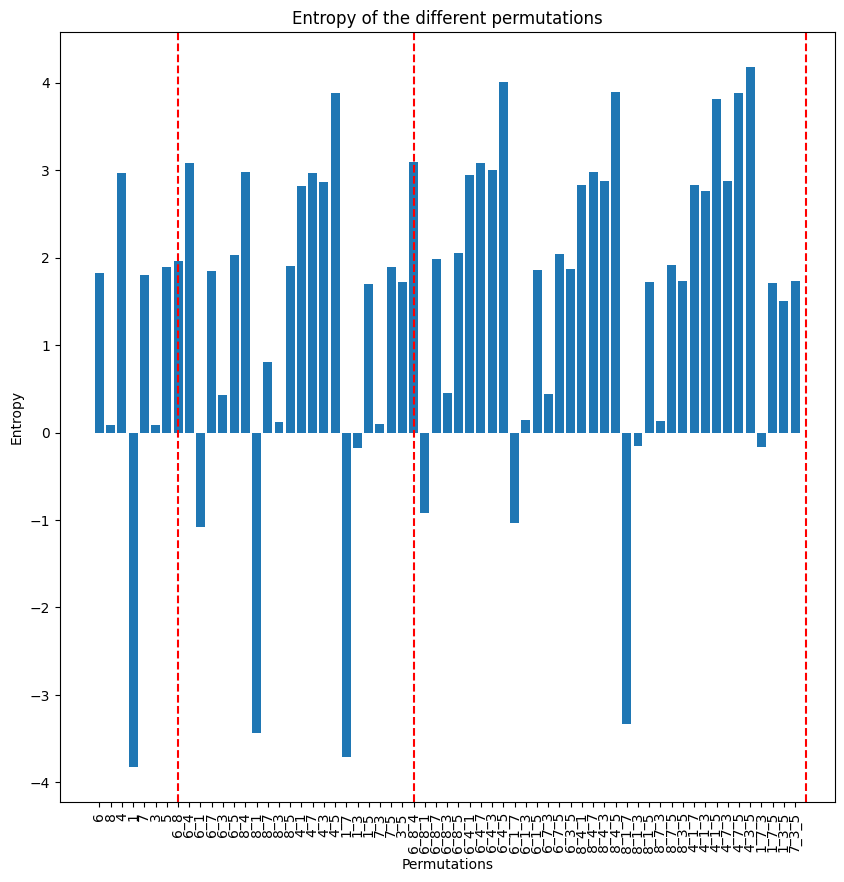

In [28]:
from math import comb

diving_lines = []
div = 0
for i in range(1, 4):
    div1 = comb(7, i) + div
    diving_lines.append(div1)
    max_partion = np.argmax(tot_entropy[div:div1]) + div
    print(f'Best partition for {i} elements: {permutations[max_partion]}')
    div = div1
    
plt.figure(figsize=(10, 10))
plt.bar(names_list, tot_entropy)
plt.xlabel('Permutations')
#rotate x labels
plt.xticks(rotation=90)
plt.ylabel('Entropy')
plt.title('Entropy of the different permutations')
    
for line in diving_lines:
    plt.axvline(x=line, color='r', linestyle='--')




Best partition for 1 elements: 2
Best partition for 2 elements: 14
Best partition for 3 elements: 30


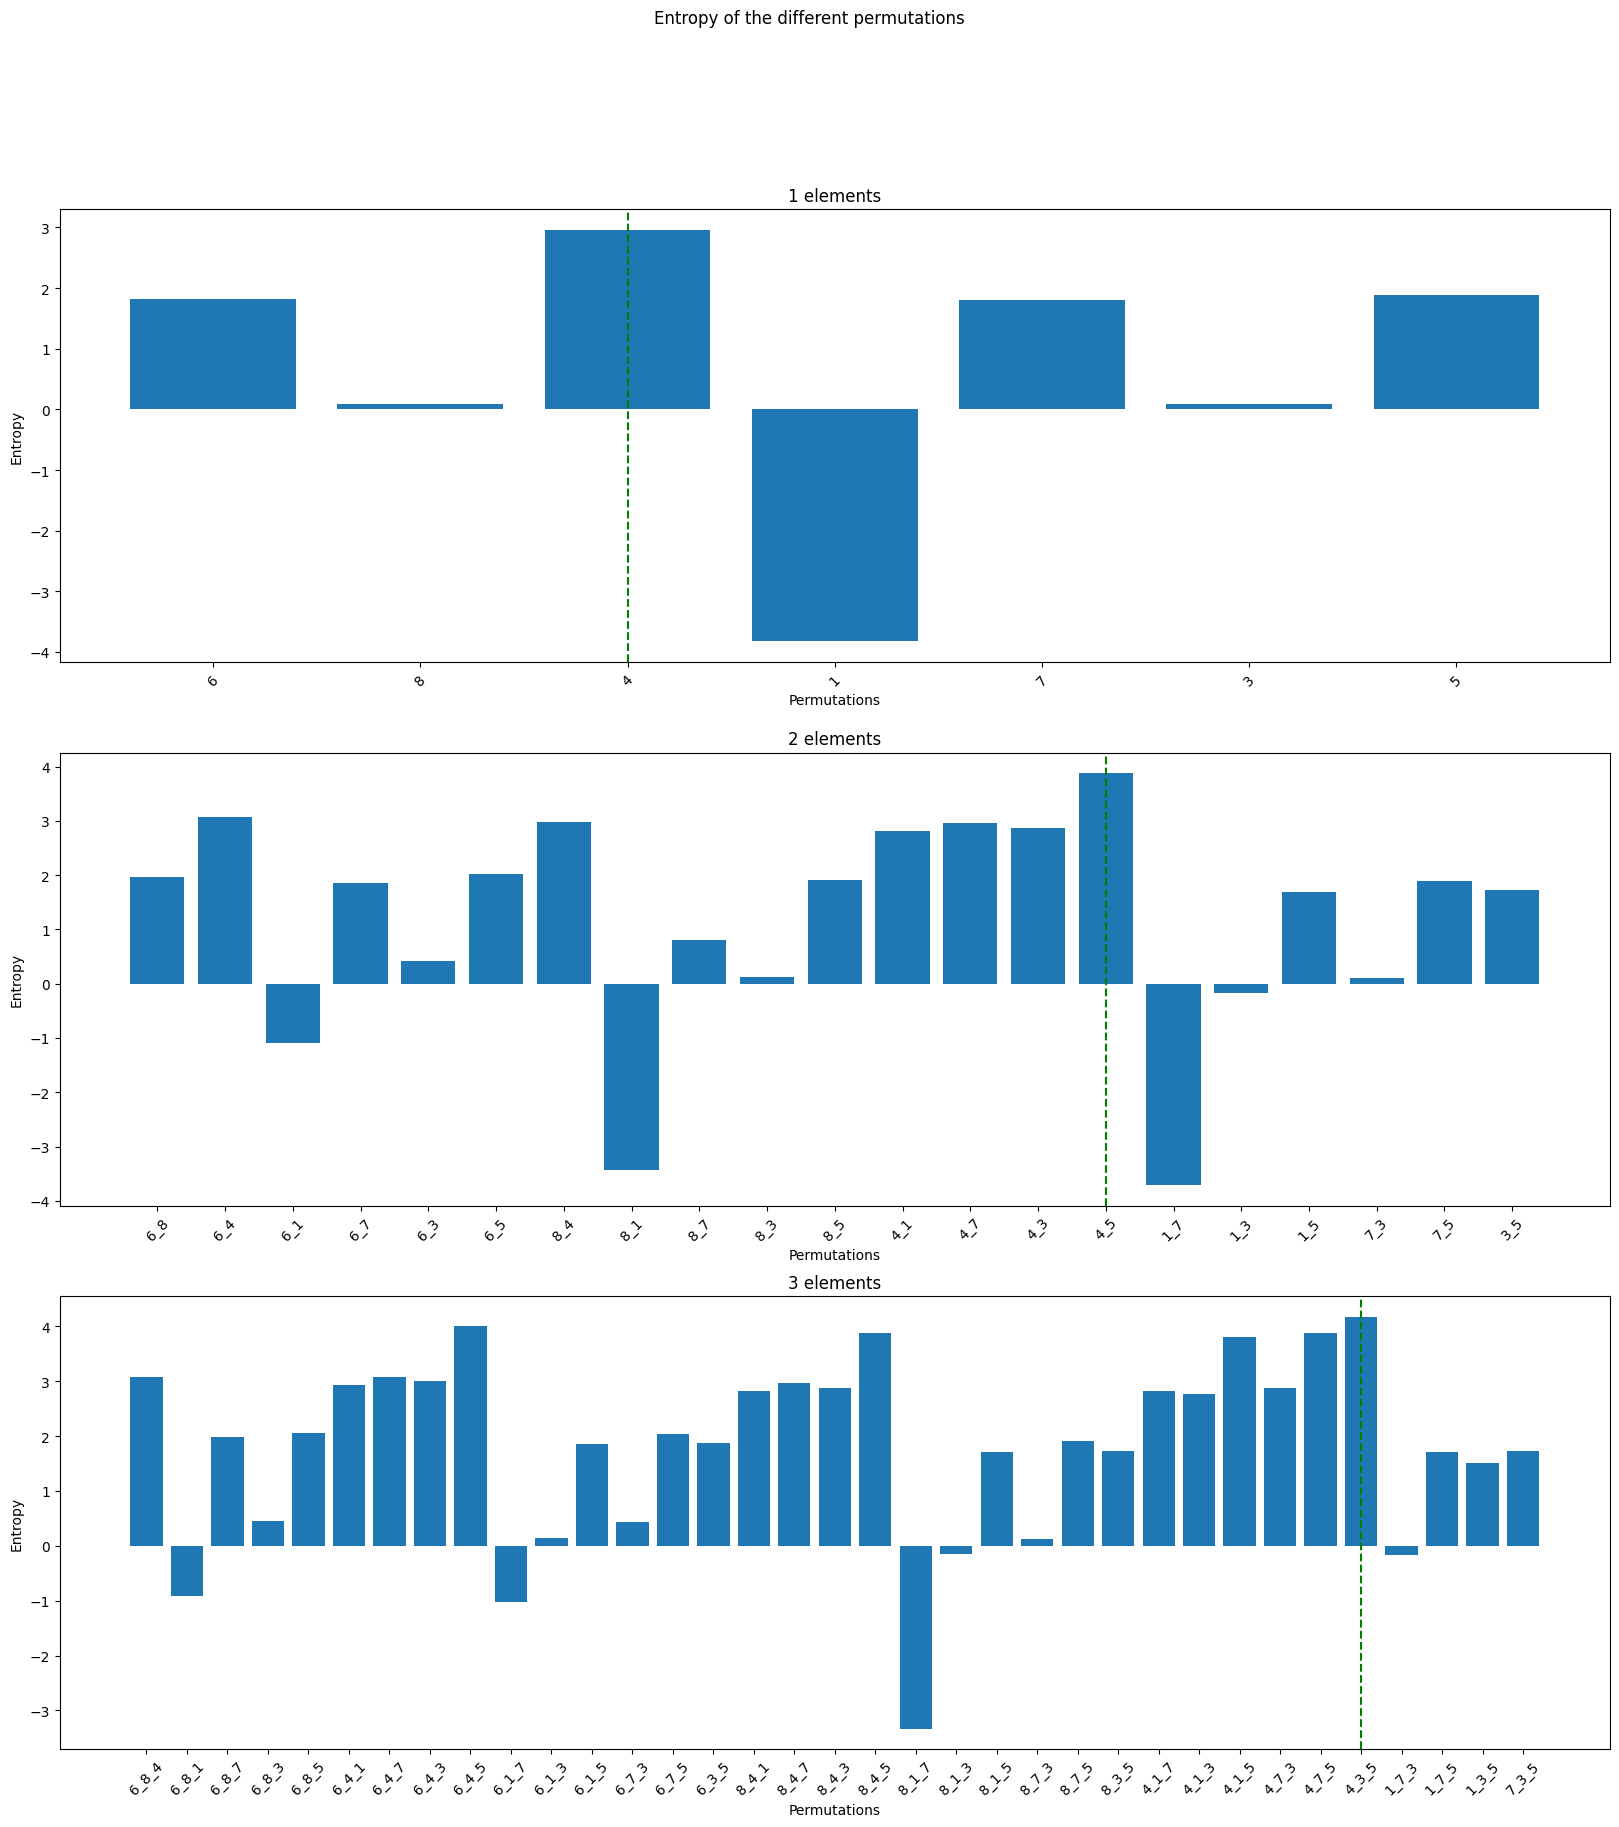

In [29]:
# make 3 suplots
fig, axs = plt.subplots(3, 1, figsize=(20, 20))
fig.suptitle('Entropy of the different permutations')
div= 0
for i in range(3):
    div1 = diving_lines[i]
    axs[i].bar(names_list[div:div1], tot_entropy[div:div1])
    max_partion = np.argmax(tot_entropy[div:div1])
    print(f'Best partition for {i+1} elements: {max_partion}')
    axs[i].axvline(x=max_partion, color='g', linestyle='--')
    axs[i].set_title(f'{i+1} elements')
    axs[i].set_ylabel('Entropy')
    axs[i].set_xlabel('Permutations')
    axs[i].set_xticklabels(names_list[div:div1], rotation=45)
   
    div = div1




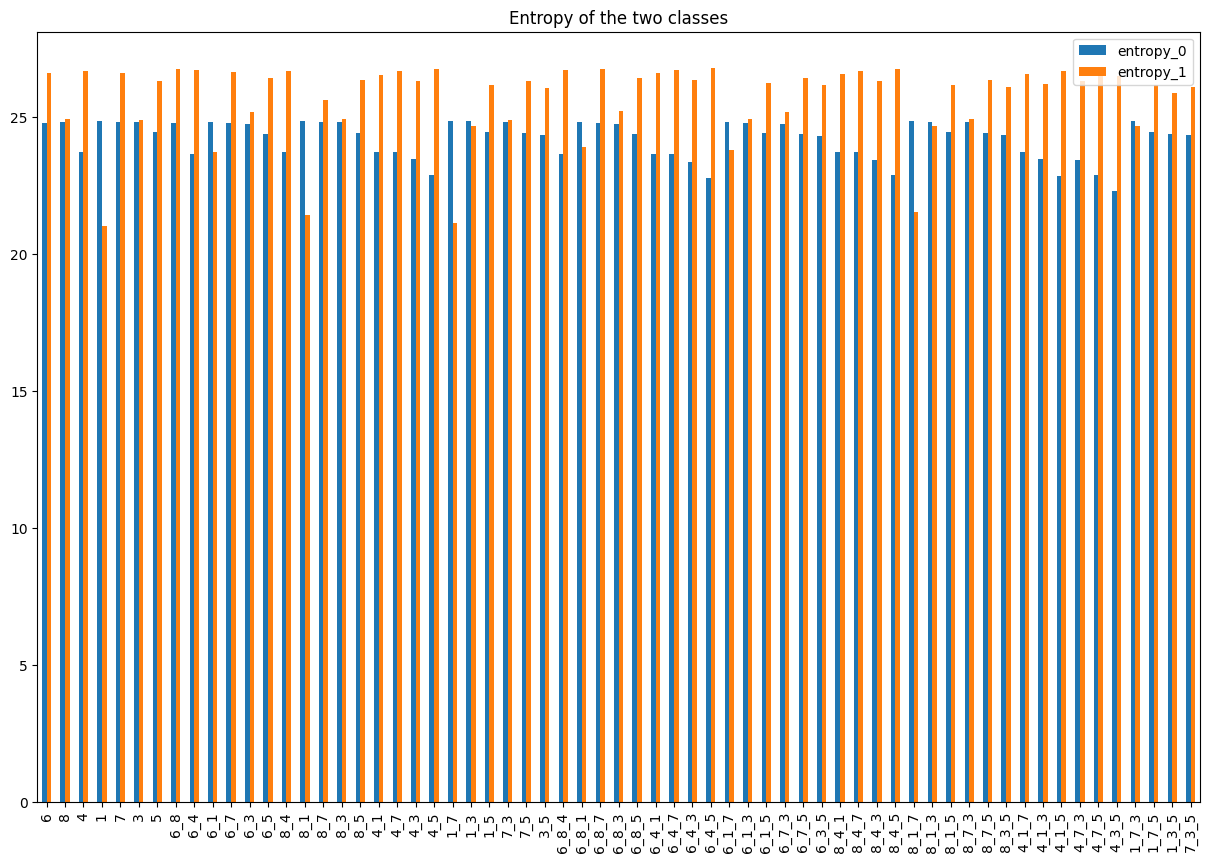

In [30]:
df_s0 = pd.DataFrame(tot_entropy_0, names_list)
df_s1 = pd.DataFrame(tot_entropy_1, names_list)
df_s01 = pd.concat([df_s0, df_s1], axis=1)

df_s01.columns = ['entropy_0', 'entropy_1']

df_s01.plot(kind = 'bar', figsize = (15, 10), title = 'Entropy of the two classes')
plt.show()


# building the y

In [31]:
new_feature_train = np.zeros(len(y_hot_train))
new_feature_valid = np.zeros(len(y_hot_valid))
for i in FEATURENUMBER.split('_'):
    new_feature_train += y_hot_train[f'Claim Injury Type_{i}']
    new_feature_valid += y_hot_valid[f'Claim Injury Type_{i}']
y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'] = new_feature_train
y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'] = new_feature_valid


# feature selection

## Correlation with target variable

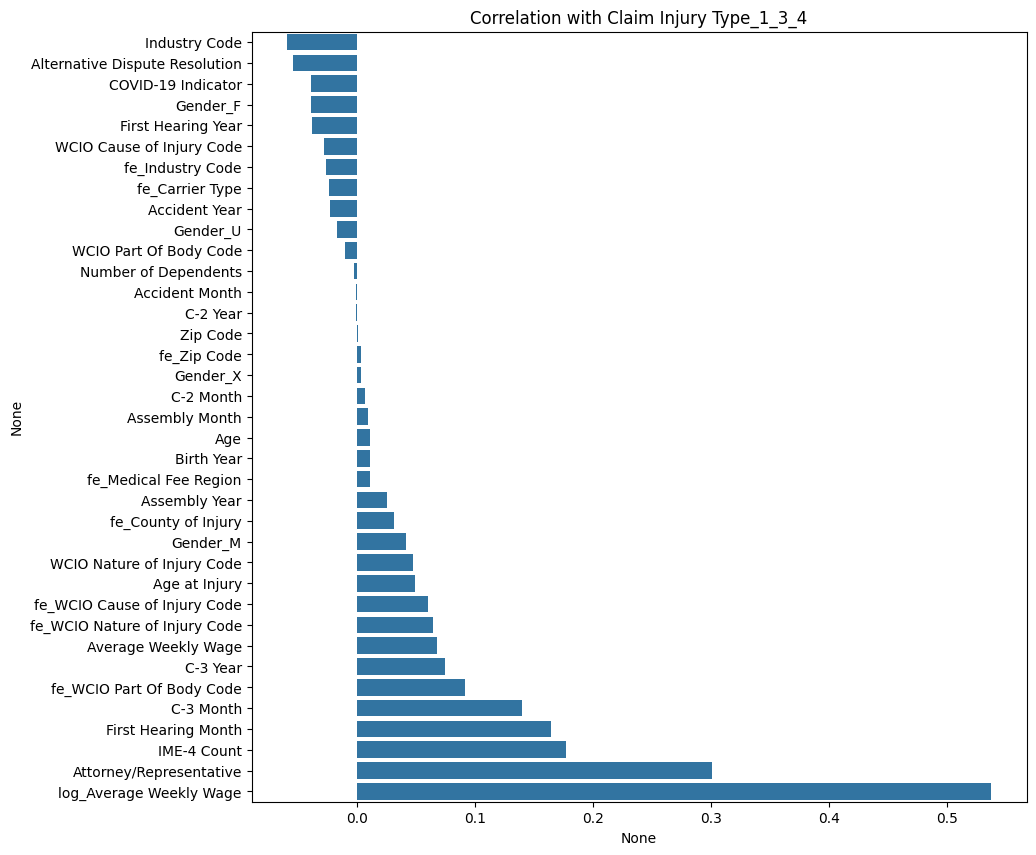

In [32]:
# correlation with target
numcols = df_train.select_dtypes(include=['Int64', 'float64']).columns
corr = df_train[numcols].corrwith(y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
corr = corr.sort_values(ascending=True)

plt.figure(figsize=(10, 10))
sns.barplot(x=corr, y=corr.index)
plt.title(f'Correlation with Claim Injury Type_{FEATURENUMBER}')
plt.show()


In [33]:
def entropy(feature):
    return -np.sum([p*np.log2(p) for p in feature.value_counts(normalize=True)])

In [34]:
def two_col_entropy_corr(f1, f2, n_iter=30, n_frac=0.5):
    baseline_s_x1 = entropy(f1)
    baseline_s_x2 = entropy(f2)

    s_x1 = []
    s_x2 = []
    for i in range(n_iter):
        x1 = f1.sample(frac=0.9, random_state=i)
        x2 = f2.sample(frac=0.9, random_state=i)
        s_x1.append(baseline_s_x1 - entropy(x1)/baseline_s_x1)
        s_x2.append(baseline_s_x2 - entropy(x2)/baseline_s_x2)
    return np.corrcoef(s_x1, s_x2)[0, 1]

In [35]:
# import log
from math import log

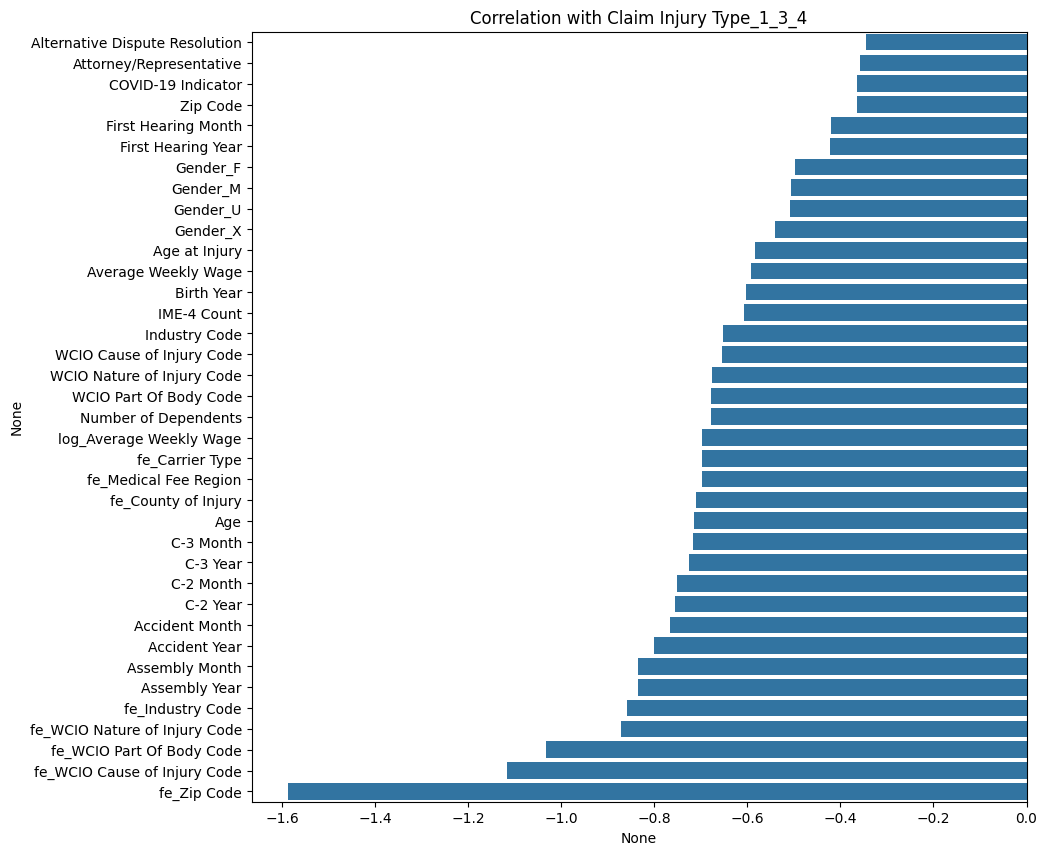

In [36]:
s_corr = []
for col in numcols:
    s_col = two_col_entropy_corr(df_train[col], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
    s_col = log((s_col +1)/2)
    s_corr.append(s_col)
    
s_corr = pd.Series(s_corr, index=numcols).sort_values(ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x=s_corr, y=numcols)
plt.title(f'Correlation with Claim Injury Type_{FEATURENUMBER}')
plt.show()


In [37]:
# removing the columns with low correlation
selected_cols = s_corr[s_corr > -0.8].index

## correation between the selected columns


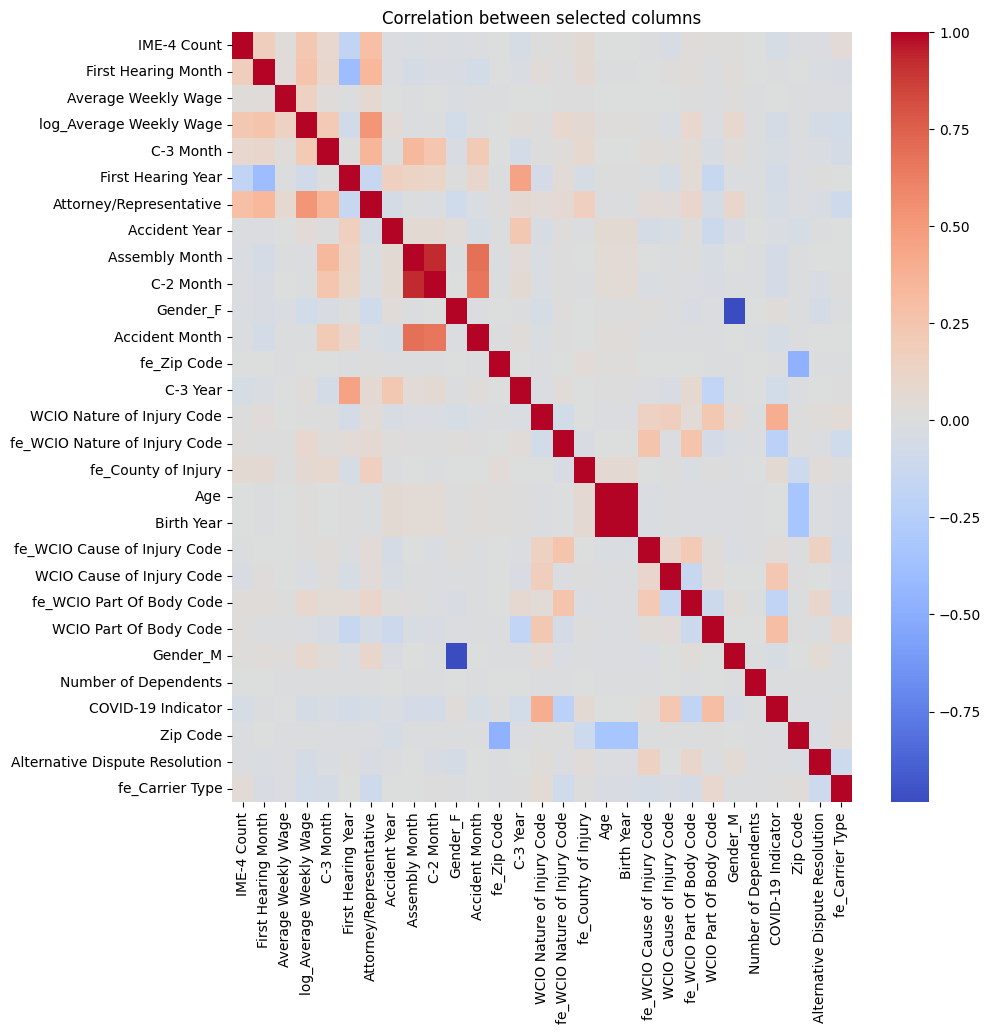

In [38]:
#correation between the selected columns
corr = df_train[selected_cols].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation between selected columns')
plt.show()

## remove the columns with high correlation

In [39]:
# remove the columns with high correlation
corr_matrix = corr.abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

In [40]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [41]:
to_drop

['C-2 Month', 'Birth Year', 'Gender_M']

In [42]:
selected_cols = [col for col in selected_cols if col not in to_drop]
len(selected_cols)

26

In [43]:
def entropy_corr(df, n_iter=30, n_frac=0.5):

    entropy_matrix = []
    for col in df.columns:
        s = entropy(df[col])
        delta_entropy = []
        for i in range(n_iter):
            x = df[col].sample(frac=n_frac, random_state=i)
            delta_entropy.append(s - entropy(x) / s)
        entropy_matrix.append(delta_entropy)
    entropy_matrix = pd.DataFrame(entropy_matrix, index=df.columns)
    entropy_matrix = entropy_matrix.T.corr()
    return entropy_matrix.applymap(lambda x: log((x + 1) / 2))

<Axes: >

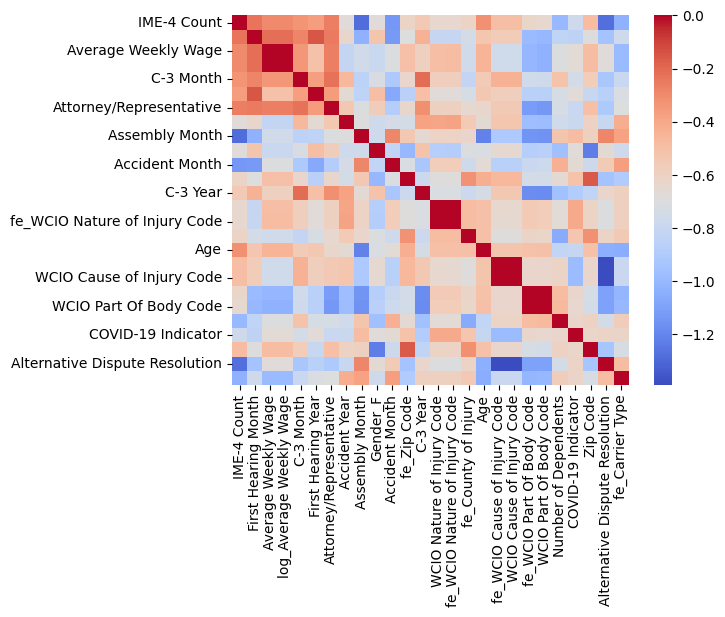

In [44]:
entropy_corr_matrix = entropy_corr(df_train[selected_cols])
sns.heatmap(entropy_corr_matrix, annot=False, cmap='coolwarm')

In [45]:
upper = entropy_corr_matrix.where(np.triu(np.ones(entropy_corr_matrix.shape), k=1).astype(bool))
to_drop_2 = [column for column in upper.columns if any(upper[column] > -0.2)]
to_drop_2

['log_Average Weekly Wage',
 'First Hearing Year',
 'fe_WCIO Nature of Injury Code',
 'WCIO Cause of Injury Code',
 'WCIO Part Of Body Code',
 'Zip Code']

In [46]:
selected_cols_2 = [col for col in selected_cols if col not in to_drop_2]
len(selected_cols_2)

20

In [47]:
selected_cols_2

['IME-4 Count',
 'First Hearing Month',
 'Average Weekly Wage',
 'C-3 Month',
 'Attorney/Representative',
 'Accident Year',
 'Assembly Month',
 'Gender_F',
 'Accident Month',
 'fe_Zip Code',
 'C-3 Year',
 'WCIO Nature of Injury Code',
 'fe_County of Injury',
 'Age',
 'fe_WCIO Cause of Injury Code',
 'fe_WCIO Part Of Body Code',
 'Number of Dependents',
 'COVID-19 Indicator',
 'Alternative Dispute Resolution',
 'fe_Carrier Type']

# model selection

In [48]:
# evaluate the classifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

model_full = []
model_selected = []
model_selected_2 = []

model_full_cmax = []
model_selected_cmax = []
model_selected_2_cmax = []


#### report_and_save()

In [49]:
# Create a string
# Save the model
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def report_and_save (model,model_name,y_pred, y, model_filepath = '../Models'
                     , report_filepath = '../Reports', print_report = True): 
    
    
    model_parameters = model.get_params()
    model_filename = model_name + '.sav'
    full_model_filename_os = os.path.join(model_filepath, model_filename)
    report_filename = model_name + '.txt'
    full_report_filename_os = os.path.join(report_filepath, report_filename)

    try:
        with open(full_model_filename_os, 'wb') as file:
            pickle.dump(model, file)
    except Exception as e:
        print(f"An error occurred while saving the model: {e}")
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    cm = confusion_matrix(y, y_pred, normalize='true')

    # Save the string into a text file
    try:
        with open(full_report_filename_os, "w") as file:
            file.write(model_name)
            file.write("\n________________________\n")
            file.write('model_parameters: \n')
            file.write(str(model_parameters).replace(",", "\n"))   
            file.write("\n________________________\n")
            file.write('Accuracy: ')
            file.write(str(accuracy))
            file.write("\n________________________\n")
            file.write('Precision: ')
            file.write(str(precision))
            file.write("\n________________________\n")
            file.write('Recall: ')
            file.write(str(recall))
            file.write("\n________________________\n")
            file.write('Confusion Matrix:\n')
            file.write(str(cm))
            file.write("\n________________________\n")
    except Exception as e:
        print(f"An error occurred while writing the report: {e}")
    
    if print_report:
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        plt.figure(figsize=(10, 10))
        sns.heatmap(cm, annot=True, cmap='coolwarm')
        plt.title(f'Confusion Matrix {model_name}')   


## decision tree classifier

An error occurred while writing the report: [Errno 2] No such file or directory: '../Reports/1_3_4_DecisionTreeClassifier_1.txt'
Accuracy: 0.6685364876400188
Precision: 0.6634566379926146
Recall: 0.6685364876400188
An error occurred while writing the report: [Errno 2] No such file or directory: '../Reports/1_3_4_DecisionTreeClassifier_selected.txt'
Accuracy: 0.574386356113792
Precision: 0.5860176419049286
Recall: 0.574386356113792
An error occurred while writing the report: [Errno 2] No such file or directory: '../Reports/1_3_4_DecisionTreeClassifier_selected_2.txt'
Accuracy: 0.5493441109349686
Precision: 0.5752760284604066
Recall: 0.5493441109349686


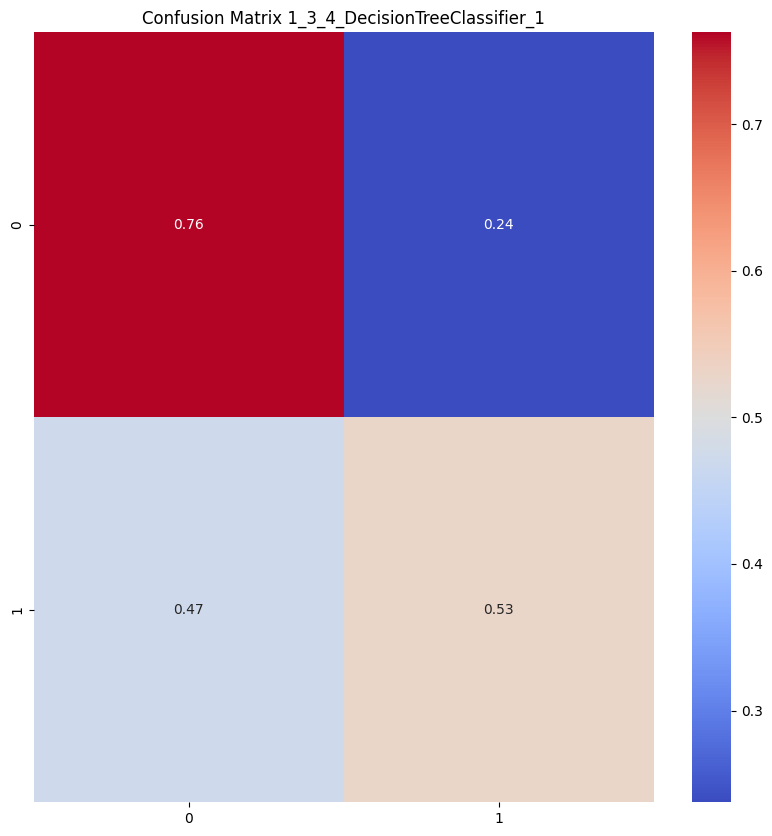

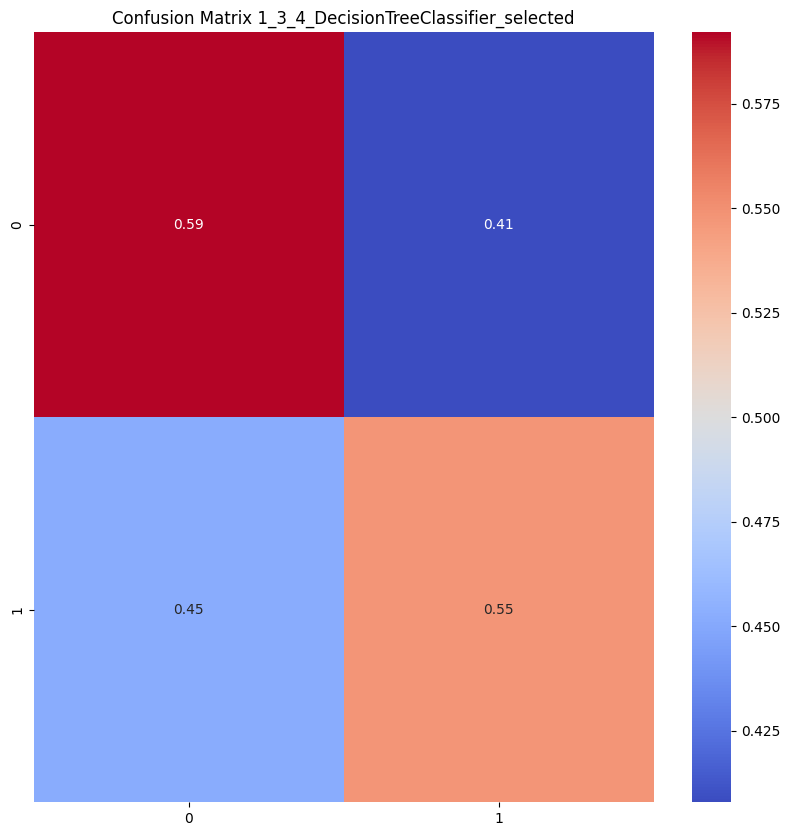

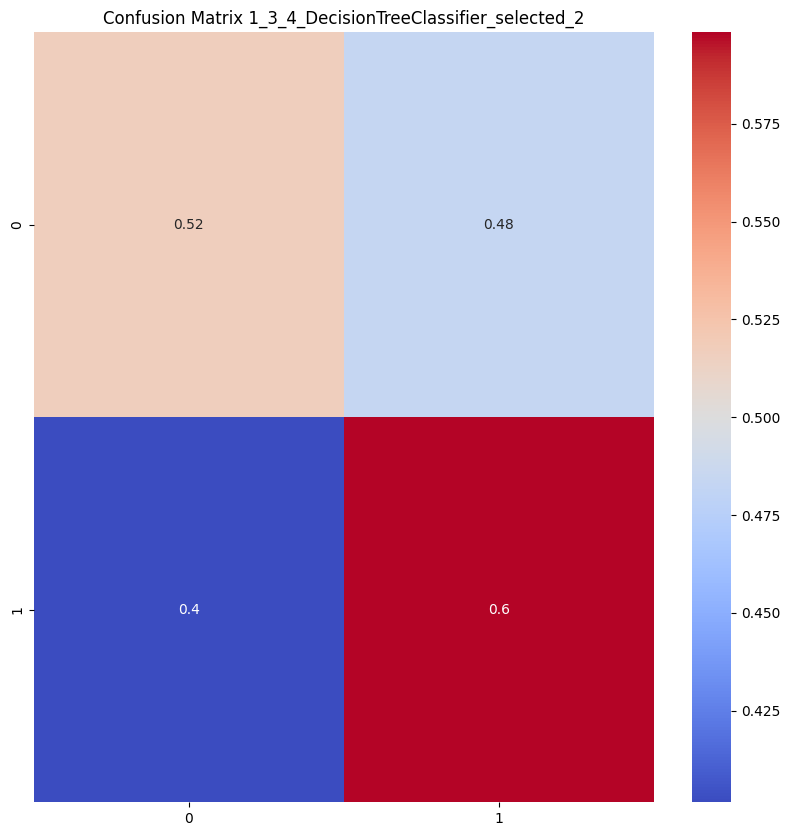

In [50]:
from sklearn.tree import DecisionTreeClassifier
# create a decision tree classifier
DecisionTreeClassifier_1 = DecisionTreeClassifier(random_state=0)
DecisionTreeClassifier_selected = DecisionTreeClassifier(random_state=0)
DecisionTreeClassifier_selected_2 = DecisionTreeClassifier(random_state=0)
num_cols = [col for col in df_train.columns if df_train[col].dtype in ['Int64', 'int64', 'float64','Float64']]

# train the classifier
DecisionTreeClassifier_1.fit(df_train[num_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
DecisionTreeClassifier_selected.fit(df_train[selected_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
DecisionTreeClassifier_selected_2.fit(df_train[selected_cols_2], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])

y_pred_full = DecisionTreeClassifier_1.predict(df_valid[num_cols])
y_pred_selected = DecisionTreeClassifier_selected.predict(df_valid[selected_cols])
y_pred_selected_2 = DecisionTreeClassifier_selected_2.predict(df_valid[selected_cols_2])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected)
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, average='macro')

model_full.append(("DecisionTreeClassifier",accuracy_full, f1_full))
model_selected.append(("DecisionTreeClassifier",accuracy_selected, f1_selected))
model_selected_2.append(("DecisionTreeClassifier",accuracy_selected_2, f1_selected_2))

cm_full = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, normalize='true')
cm_selected = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, normalize='true')
cm_selected_2 = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, normalize='true')

model_full_cmax.append(("DecisionTreeClassifier",cm_full.max()))
model_selected_cmax.append(("DecisionTreeClassifier",cm_selected.max()))
model_selected_2_cmax.append(("DecisionTreeClassifier",cm_selected_2.max()))


report_and_save(DecisionTreeClassifier_1, f'{FEATURENUMBER}_DecisionTreeClassifier_1', y_pred_full, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(DecisionTreeClassifier_selected, f'{FEATURENUMBER}_DecisionTreeClassifier_selected', y_pred_selected, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(DecisionTreeClassifier_selected_2, f'{FEATURENUMBER}_DecisionTreeClassifier_selected_2', y_pred_selected_2, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])





## logistic regression

In [51]:
# import logistic regression
from sklearn.linear_model import LogisticRegression

# create a logistic regression classifier
LogisticRegression_1 = LogisticRegression(random_state=0)
LogisticRegression_selected = LogisticRegression(random_state=0)
LogisticRegression_selected_2 = LogisticRegression(random_state=0)

# train the classifier
LogisticRegression_1.fit(df_train[num_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
LogisticRegression_selected.fit(df_train[selected_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
LogisticRegression_selected_2.fit(df_train[selected_cols_2], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], LogisticRegression_1.predict(df_valid[num_cols]))
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], LogisticRegression_selected.predict(df_valid[selected_cols]))
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], LogisticRegression_selected_2.predict(df_valid[selected_cols_2]))

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], LogisticRegression_1.predict(df_valid[num_cols]), average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], LogisticRegression_selected.predict(df_valid[selected_cols]), average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], LogisticRegression_selected_2.predict(df_valid[selected_cols_2]), average='macro')

model_full.append(("LogisticRegression",accuracy_full, f1_full))
model_selected.append(("LogisticRegression",accuracy_selected, f1_selected))
model_selected_2.append(("LogisticRegression",accuracy_selected_2, f1_selected_2))

cm_full = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, normalize='true')
cm_selected = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, normalize='true')
cm_selected_2 = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, normalize='true')

model_full_cmax.append(("DecisionTreeClassifier",cm_full.max()))
model_selected_cmax.append(("DecisionTreeClassifier",cm_selected.max()))
model_selected_2_cmax.append(("DecisionTreeClassifier",cm_selected_2.max()))

report_and_save(LogisticRegression_1, f'{FEATURENUMBER}LogisticRegression_1', LogisticRegression_1.predict(df_valid[num_cols]), y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(LogisticRegression_selected, f'{FEATURENUMBER}LogisticRegression_selected', LogisticRegression_selected.predict(df_valid[selected_cols]), y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(LogisticRegression_selected_2, f'{FEATURENUMBER}LogisticRegression_selected_2', LogisticRegression_selected_2.predict(df_valid[selected_cols_2]), y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## random forest

An error occurred while writing the report: [Errno 2] No such file or directory: '../Reports/1RandomForestClassifier_1.txt'
Accuracy: 0.9785638381269272
Precision: 0.9726774151324141
Recall: 0.9785638381269272
An error occurred while writing the report: [Errno 2] No such file or directory: '../Reports/1RandomForestClassifier_selected.txt'
Accuracy: 0.978441893280839
Precision: 0.9710619477230351
Recall: 0.978441893280839
An error occurred while writing the report: [Errno 2] No such file or directory: '../Reports/1RandomForestClassifier_selected_2.txt'
Accuracy: 0.9778931414734422
Precision: 0.967344708340799
Recall: 0.9778931414734422


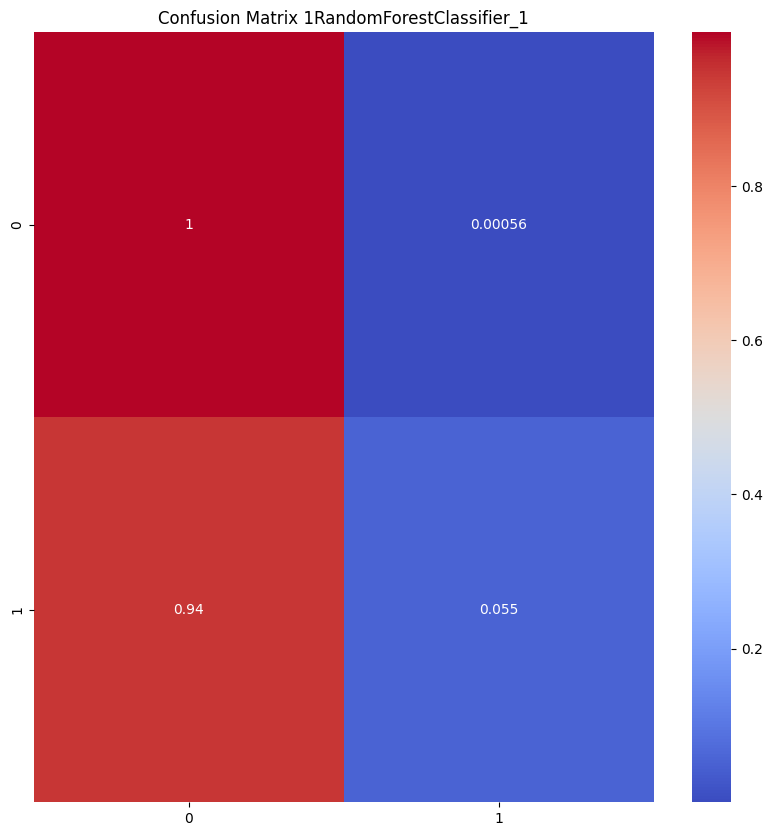

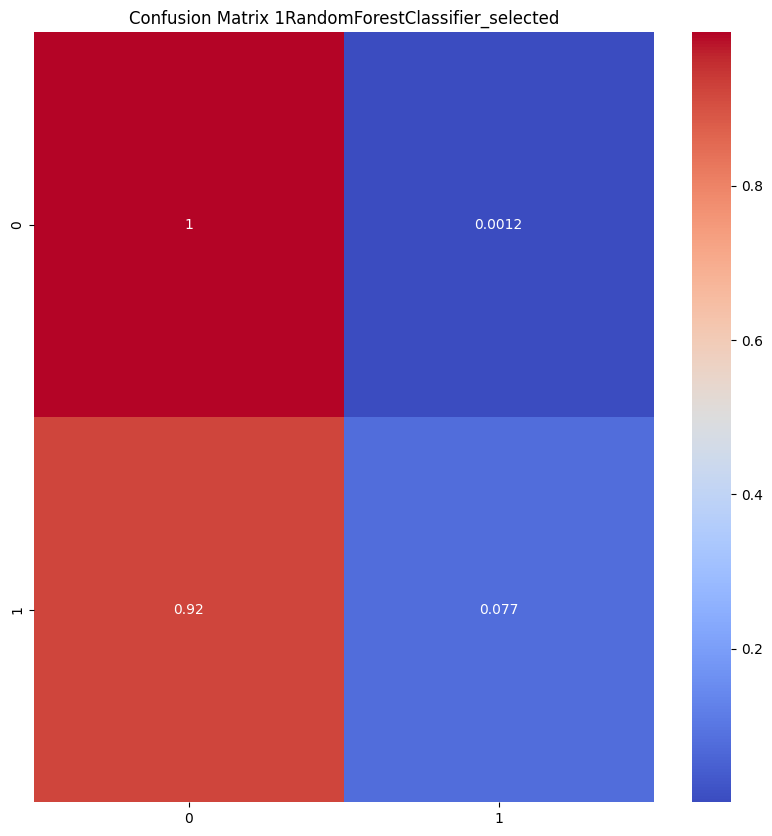

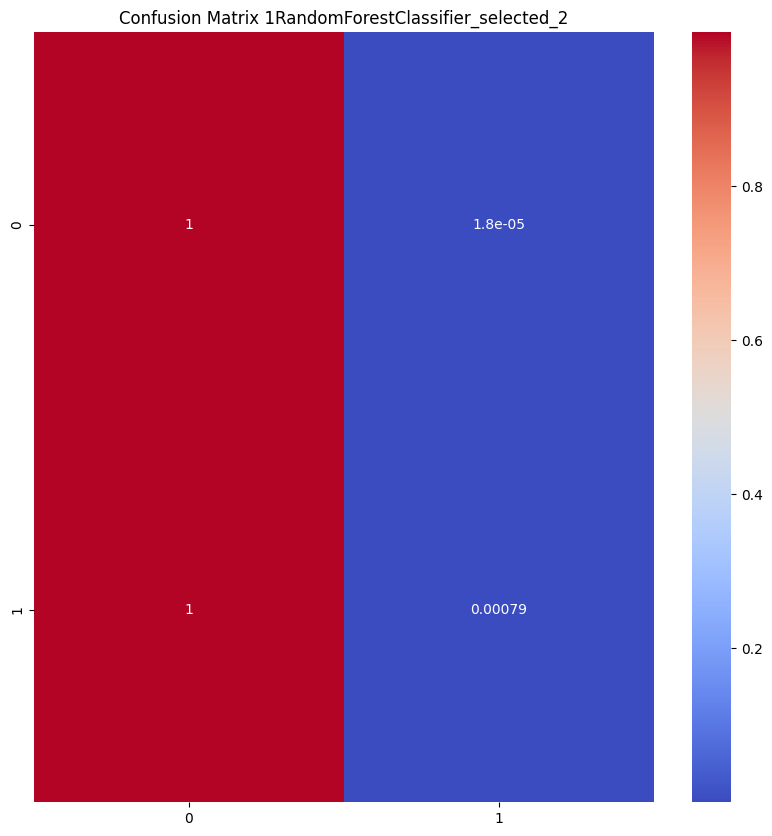

In [ ]:
random_state = 42

# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

# create a random forest classifier
RandomForestClassifier_1 = RandomForestClassifier(random_state=random_state)
RandomForestClassifier_selected = RandomForestClassifier(random_state=random_state)
RandomForestClassifier_selected_2 = RandomForestClassifier(random_state=random_state)

# train the classifier
RandomForestClassifier_1.fit(df_train[num_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
RandomForestClassifier_selected.fit(df_train[selected_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
RandomForestClassifier_selected_2.fit(df_train[selected_cols_2], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])

# evaluate the classifier
y_pred_full = RandomForestClassifier_1.predict(df_valid[num_cols])
y_pred_selected = RandomForestClassifier_selected.predict(df_valid[selected_cols])
y_pred_selected_2 = RandomForestClassifier_selected_2.predict(df_valid[selected_cols_2])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected)
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, average='macro')

model_full.append(("RandomForestClassifier",accuracy_full, f1_full))
model_selected.append(("RandomForestClassifier",accuracy_selected, f1_selected))
model_selected_2.append(("RandomForestClassifier",accuracy_selected_2, f1_selected_2))

cm_full = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, normalize='true')
cm_selected = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, normalize='true')
cm_selected_2 = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, normalize='true')

model_full_cmax.append(("DecisionTreeClassifier",cm_full.max()))
model_selected_cmax.append(("DecisionTreeClassifier",cm_selected.max()))
model_selected_2_cmax.append(("DecisionTreeClassifier",cm_selected_2.max()))


report_and_save(RandomForestClassifier_1, f'{FEATURENUMBER}RandomForestClassifier_1', y_pred_full, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(RandomForestClassifier_selected, f'{FEATURENUMBER}RandomForestClassifier_selected', y_pred_selected, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(RandomForestClassifier_selected_2, f'{FEATURENUMBER}RandomForestClassifier_selected_2', y_pred_selected_2, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])



## XGBoost

In [ ]:
#! pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 62.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 63.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


An error occurred while writing the report: [Errno 2] No such file or directory: '../Reports/1XGBClassifier_1.txt'
Accuracy: 0.9750535686288173
Precision: 0.9630745663123504
Recall: 0.9750535686288173
An error occurred while writing the report: [Errno 2] No such file or directory: '../Reports/1XGBClassifier_selected.txt'
Accuracy: 0.9687298573245301
Precision: 0.9603163141379923
Recall: 0.9687298573245301
An error occurred while writing the report: [Errno 2] No such file or directory: '../Reports/1XGBClassifier_selected_2.txt'
Accuracy: 0.9736076511680574
Precision: 0.958574912271177
Recall: 0.9736076511680574


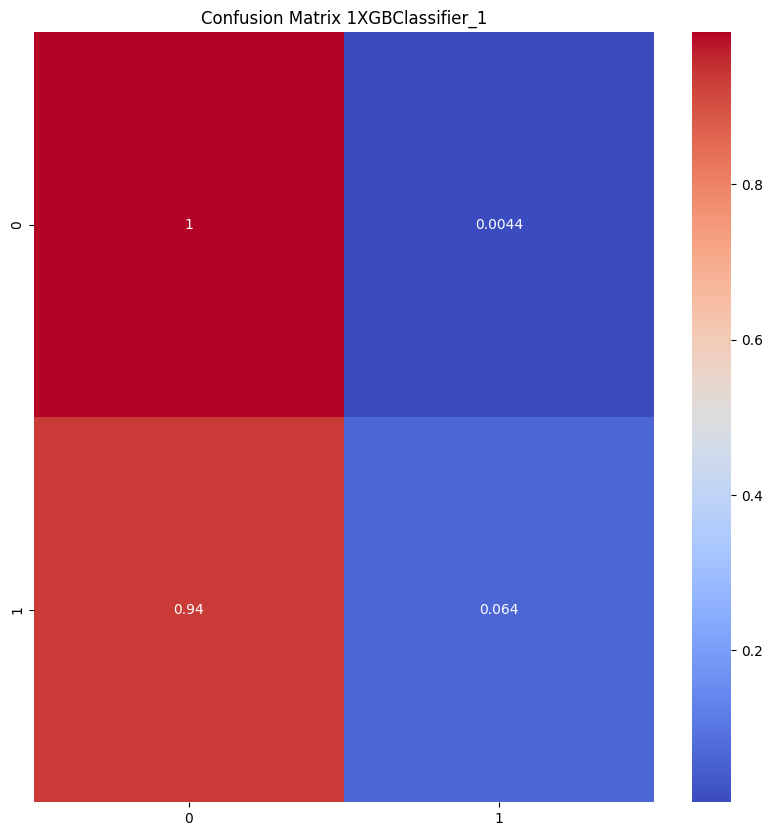

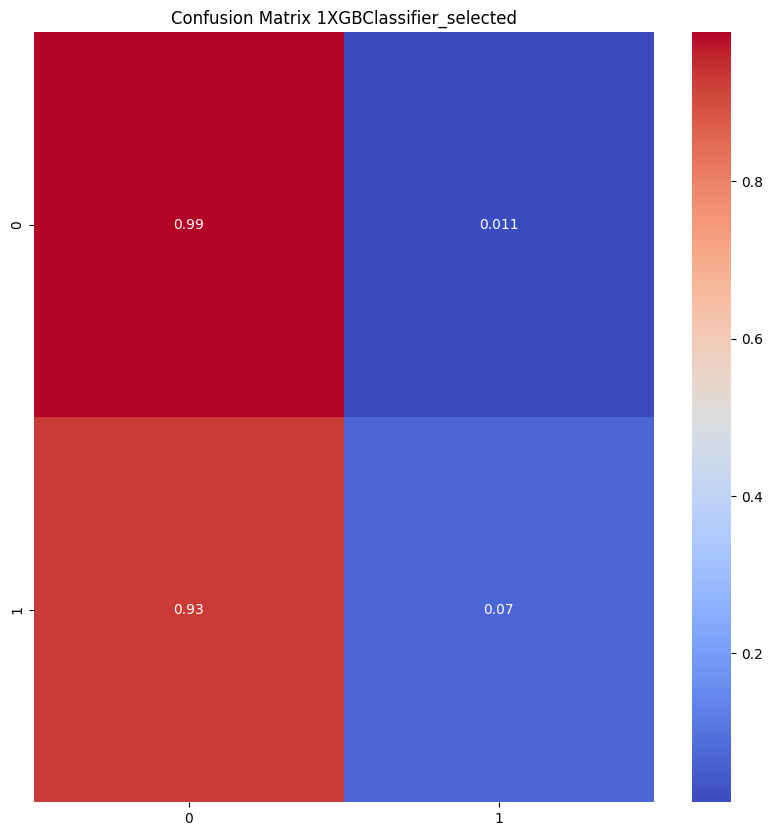

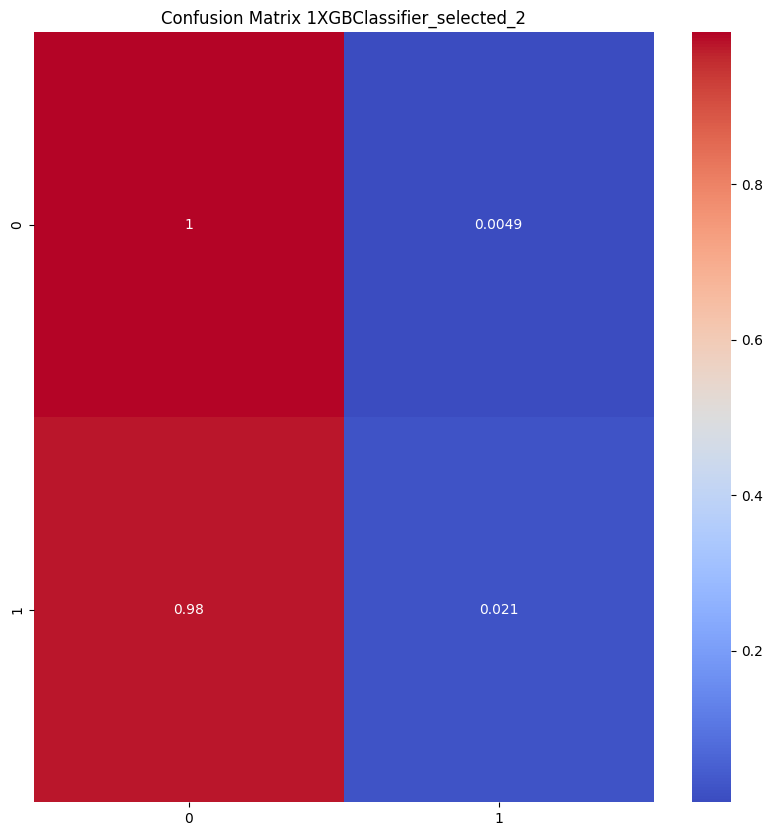

In [ ]:
# import xgboost classifier
from xgboost import XGBClassifier

# create a xgboost classifier
XGBClassifier_1 = XGBClassifier(random_state=random_state)
XGBClassifier_selected = XGBClassifier(random_state=random_state)
XGBClassifier_selected_2 = XGBClassifier(random_state=random_state)

# train the classifier
XGBClassifier_1.fit(df_train[num_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
XGBClassifier_selected.fit(df_train[selected_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
XGBClassifier_selected_2.fit(df_train[selected_cols_2], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])

# evaluate the classifier
y_pred_full = XGBClassifier_1.predict(df_valid[num_cols])
y_pred_selected = XGBClassifier_selected.predict(df_valid[selected_cols])
y_pred_selected_2 = XGBClassifier_selected_2.predict(df_valid[selected_cols_2])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected)
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2)
f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, average='macro')

model_full.append(("XGBClassifier",accuracy_full, f1_full))
model_selected.append(("XGBClassifier",accuracy_selected, f1_selected))
model_selected_2.append(("XGBClassifier",accuracy_selected_2, f1_selected_2))

cm_full = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, normalize='true')
cm_selected = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, normalize='true')
cm_selected_2 = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, normalize='true')

model_full_cmax.append(("DecisionTreeClassifier",cm_full.max()))
model_selected_cmax.append(("DecisionTreeClassifier",cm_selected.max()))
model_selected_2_cmax.append(("DecisionTreeClassifier",cm_selected_2.max()))

report_and_save(XGBClassifier_1, f'{FEATURENUMBER}XGBClassifier_1', y_pred_full, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(XGBClassifier_selected, f'{FEATURENUMBER}XGBClassifier_selected', y_pred_selected, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(XGBClassifier_selected_2, f'{FEATURENUMBER}XGBClassifier_selected_2', y_pred_selected_2, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])


## LightGBM

In [ ]:
#! pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 50.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9939, number of negative: 449281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 459220, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021643 -> initscore=-3.811182
[LightGBM] [Info] Start training from score -3.811182
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9939, number of negative: 449281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_

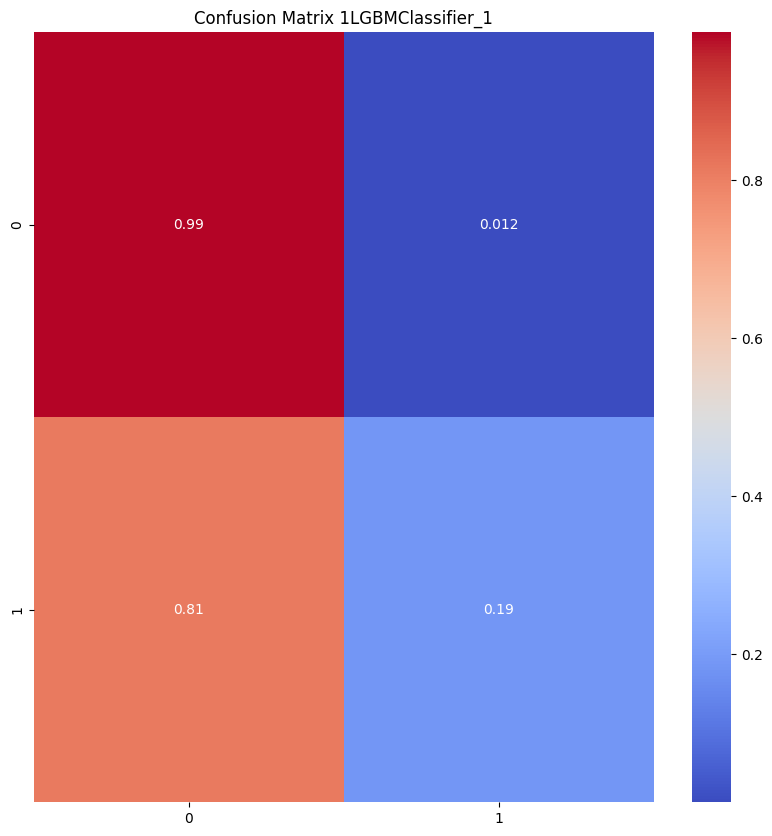

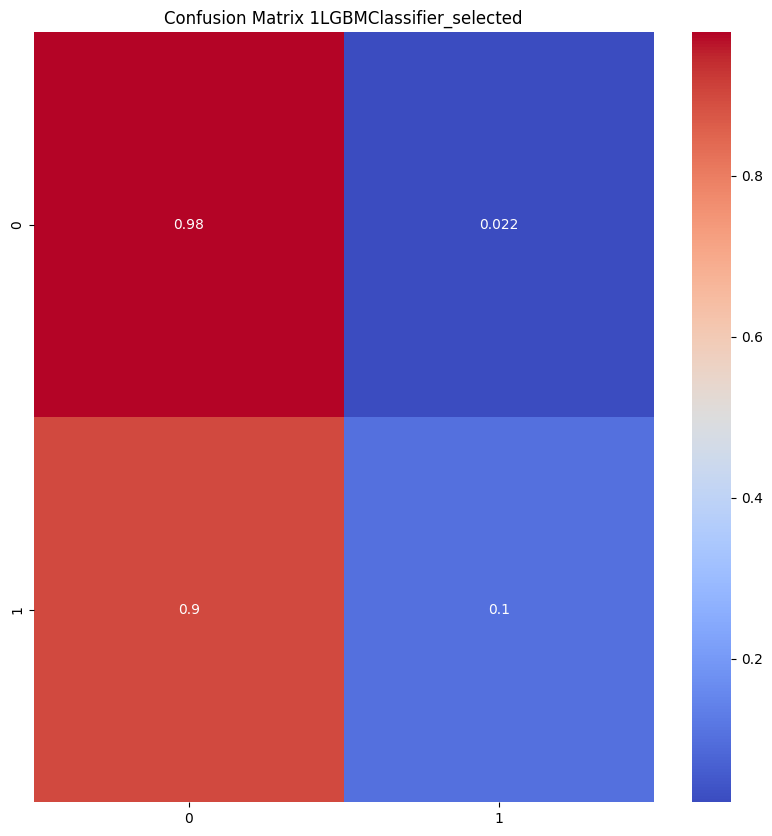

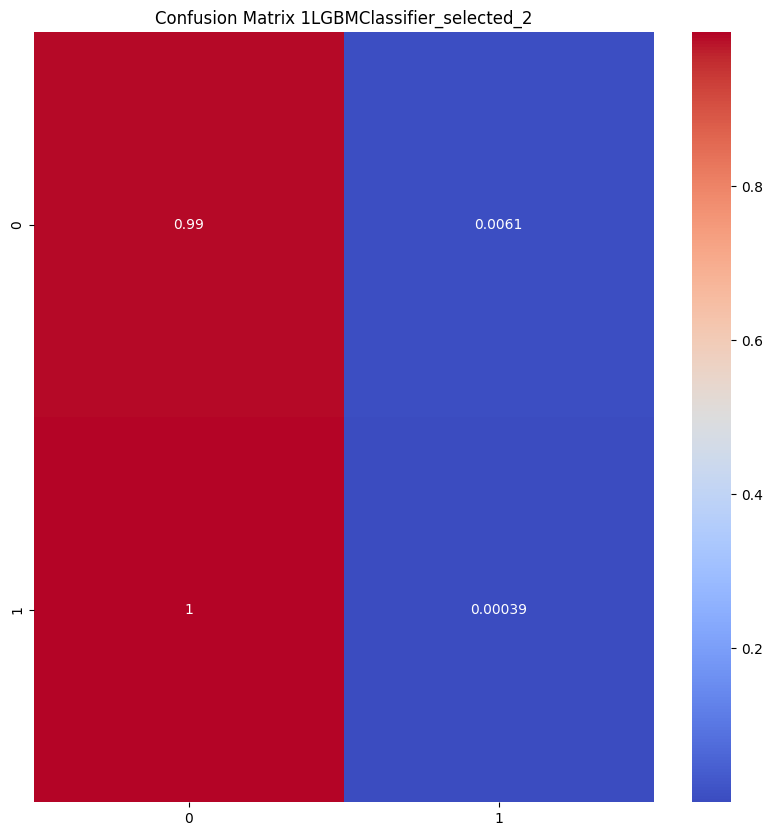

In [ ]:
# import lightgbm classifier
from lightgbm import LGBMClassifier

# create a lightgbm classifier
LGBMClassifier_1 = LGBMClassifier(random_state=random_state)
LGBMClassifier_selected = LGBMClassifier(random_state=random_state)
LGBMClassifier_selected_2 = LGBMClassifier(random_state=random_state)

# train the classifier
LGBMClassifier_1.fit(df_train[num_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
LGBMClassifier_selected.fit(df_train[selected_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
LGBMClassifier_selected_2.fit(df_train[selected_cols_2], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])

# evaluate the classifier
y_pred_full = LGBMClassifier_1.predict(df_valid[num_cols])
y_pred_selected = LGBMClassifier_selected.predict(df_valid[selected_cols])
y_pred_selected_2 = LGBMClassifier_selected_2.predict(df_valid[selected_cols_2])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected)
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2)
f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, average='macro')

model_full.append(("LGBMClassifier",accuracy_full, f1_full))
model_selected.append(("LGBMClassifier",accuracy_selected, f1_selected))
model_selected_2.append(("LGBMClassifier",accuracy_selected_2, f1_selected_2))

cm_full = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, normalize='true')
cm_selected = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, normalize='true')
cm_selected_2 = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, normalize='true')

model_full_cmax.append(("DecisionTreeClassifier",cm_full.max()))
model_selected_cmax.append(("DecisionTreeClassifier",cm_selected.max()))
model_selected_2_cmax.append(("DecisionTreeClassifier",cm_selected_2.max()))

report_and_save(LGBMClassifier_1, f'{FEATURENUMBER}LGBMClassifier_1', y_pred_full, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(LGBMClassifier_selected, f'{FEATURENUMBER}LGBMClassifier_selected', y_pred_selected, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(LGBMClassifier_selected_2, f'{FEATURENUMBER}LGBMClassifier_selected_2', y_pred_selected_2, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])




In [ ]:
for name, accuracy, f1 in model_full:
    print(f'{name}: accuracy={accuracy}, f1={f1}')


DecisionTreeClassifier: accuracy=0.9268069613086424, f1=0.5548082266305179
LogisticRegression: accuracy=0.6541818371862098, f1=0.4110759405431438
RandomForestClassifier: accuracy=0.9785638381269272, f1=0.5456524624579088
XGBClassifier: accuracy=0.9750535686288173, f1=0.5447727049131689
LGBMClassifier: accuracy=0.9699580161315611, f1=0.5994290409098469


## multilayer perceptron


In [ ]:
# multilayer perceptron
from sklearn.neural_network import MLPClassifier

# create a multilayer perceptron classifier
MLPClassifier_1 = MLPClassifier(random_state=random_state)
MLPClassifier_selected = MLPClassifier(random_state=random_state)
MLPClassifier_selected_2 = MLPClassifier(random_state=random_state)

# train the classifier
MLPClassifier_1.fit(df_train[num_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
MLPClassifier_selected.fit(df_train[selected_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
MLPClassifier_selected_2.fit(df_train[selected_cols_2], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])

# evaluate the classifier
y_pred_full = MLPClassifier_1.predict(df_valid[num_cols])
y_pred_selected = MLPClassifier_selected.predict(df_valid[selected_cols])
y_pred_selected_2 = MLPClassifier_selected_2.predict(df_valid[selected_cols_2])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected)
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, average='macro')

model_full.append(("MLPClassifier",accuracy_full, f1_full))
model_selected.append(("MLPClassifier",accuracy_selected, f1_selected))
model_selected_2.append(("MLPClassifier",accuracy_selected_2, f1_selected_2))

cm_full = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, normalize='true')
cm_selected = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, normalize='true')
cm_selected_2 = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, normalize='true')

model_full_cmax.append(("DecisionTreeClassifier",cm_full.max()))
model_selected_cmax.append(("DecisionTreeClassifier",cm_selected.max()))
model_selected_2_cmax.append(("DecisionTreeClassifier",cm_selected_2.max()))

report_and_save(MLPClassifier_1, f'{FEATURENUMBER}MLPClassifier_1', y_pred_full, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(MLPClassifier_selected, f'{FEATURENUMBER}MLPClassifier_selected', y_pred_selected, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(MLPClassifier_selected_2, f'{FEATURENUMBER}MLPClassifier_selected_2', y_pred_selected_2, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])


An error occurred while writing the report: [Errno 2] No such file or directory: '../Reports/1MLPClassifier_1.txt'
Accuracy: 0.9778931414734422
Precision: 0.9562749961407976
Recall: 0.9778931414734422
An error occurred while writing the report: [Errno 2] No such file or directory: '../Reports/1MLPClassifier_selected.txt'
Accuracy: 0.674860198944306
Precision: 0.9583472724303024
Recall: 0.674860198944306
An error occurred while writing the report: [Errno 2] No such file or directory: '../Reports/1MLPClassifier_selected_2.txt'
Accuracy: 0.8507656394265108
Precision: 0.9562511562547391
Recall: 0.8507656394265108


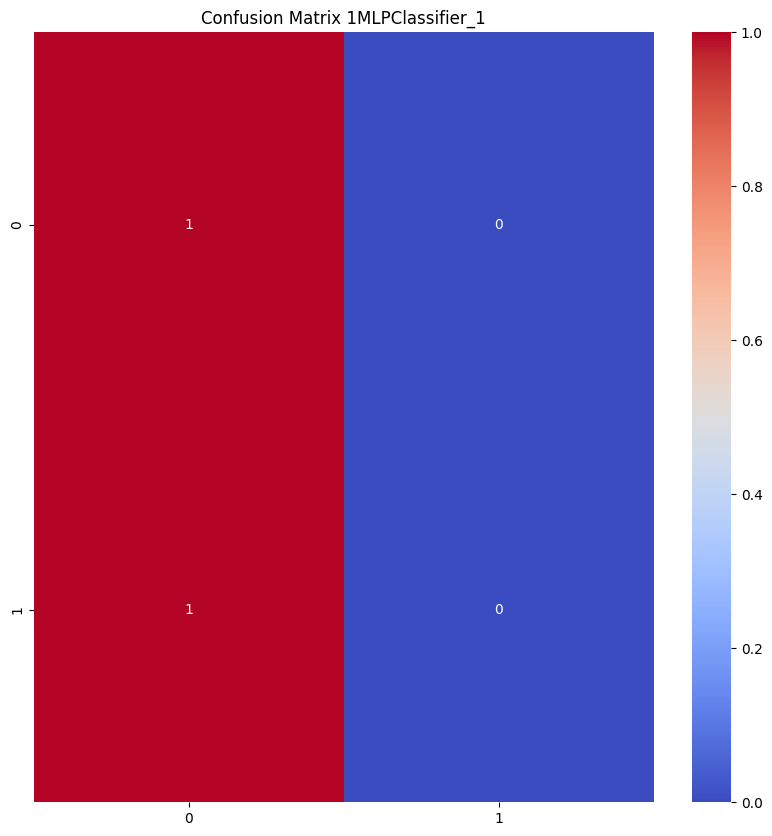

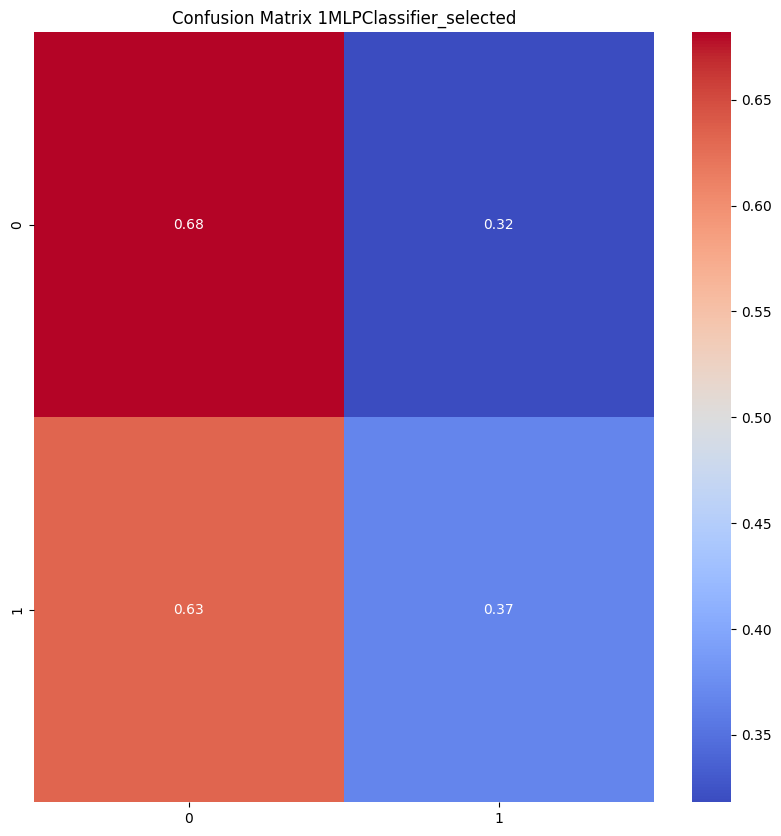

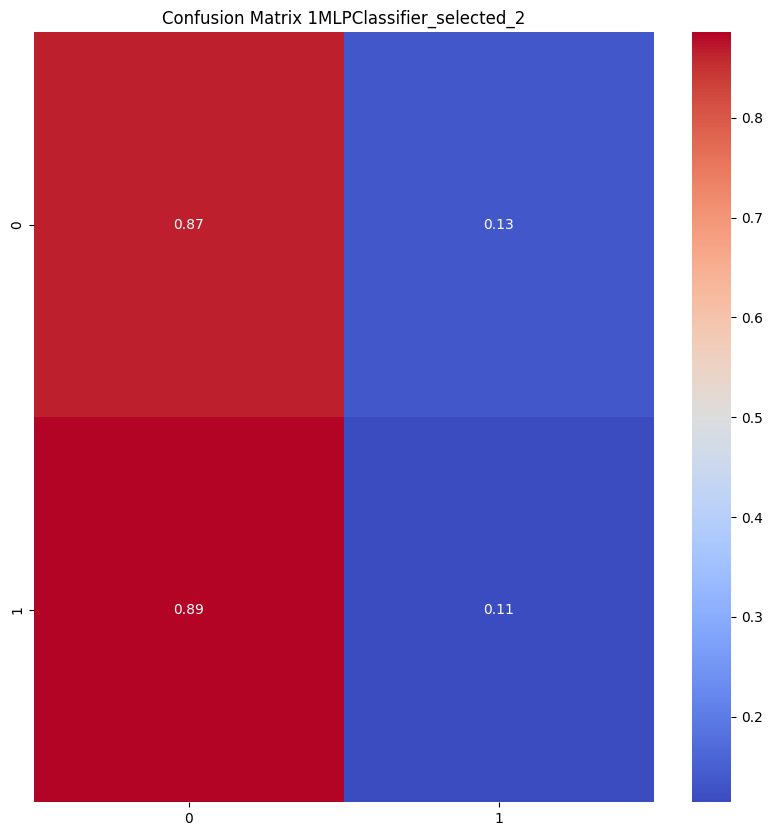

## svm classifier (commented out)

In [ ]:
"""# svm classifier
from sklearn.svm import SVC

# create a svm classifier
SVC_1 = SVC(random_state=random_state)
SVC_selected = SVC(random_state=random_state)
SVC_selected_2 = SVC(random_state=random_state)

# train the classifier
SVC_1.fit(df_train[num_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
SVC_selected.fit(df_train[selected_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
SVC_selected_2.fit(df_train[selected_cols_2], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])

# evaluate the classifier
y_pred_full = SVC_1.predict(df_valid[num_cols])
y_pred_selected = SVC_selected.predict(df_valid[selected_cols])
y_pred_selected_2 = SVC_selected_2.predict(df_valid[selected_cols_2])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected)
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, average='macro')

model_full.append(("SVC",accuracy_full, f1_full))
model_selected.append(("SVC",accuracy_selected, f1_selected))
model_selected_2.append(("SVC",accuracy_selected_2, f1_selected_2))

"""

'# svm classifier\nfrom sklearn.svm import SVC\n\n# create a svm classifier\nSVC_1 = SVC(random_state=random_state)\nSVC_selected = SVC(random_state=random_state)\nSVC_selected_2 = SVC(random_state=random_state)\n\n# train the classifier\nSVC_1.fit(df_train[num_cols], y_hot_train[f\'Claim Injury Type_{FEATURENUMBER}\'])\nSVC_selected.fit(df_train[selected_cols], y_hot_train[f\'Claim Injury Type_{FEATURENUMBER}\'])\nSVC_selected_2.fit(df_train[selected_cols_2], y_hot_train[f\'Claim Injury Type_{FEATURENUMBER}\'])\n\n# evaluate the classifier\ny_pred_full = SVC_1.predict(df_valid[num_cols])\ny_pred_selected = SVC_selected.predict(df_valid[selected_cols])\ny_pred_selected_2 = SVC_selected_2.predict(df_valid[selected_cols_2])\n\naccuracy_full  = accuracy_score(y_hot_valid[f\'Claim Injury Type_{FEATURENUMBER}\'], y_pred_full)\naccuracy_selected = accuracy_score(y_hot_valid[f\'Claim Injury Type_{FEATURENUMBER}\'], y_pred_selected)\naccuracy_selected_2 = accuracy_score(y_hot_valid[f\'Claim In

## voting classifier (commented out)

In [ ]:
"""# import the voting classifier
from sklearn.ensemble import VotingClassifier

# create a voting classifier
VotingClassifier_1 = VotingClassifier(estimators=[('DecisionTreeClassifier', DecisionTreeClassifier_1),
                                                  ('LogisticRegression', LogisticRegression_1),
                                                  ('RandomForestClassifier', RandomForestClassifier_1),
                                                  ('XGBClassifier', XGBClassifier_1),
                                                  ('LGBMClassifier', LGBMClassifier_1),
                                                  ('MLPClassifier', MLPClassifier_1)], voting='soft')
                                                  #('SVC', SVC_1)], voting='soft')


VotingClassifier_selected = VotingClassifier(estimators=[('DecisionTreeClassifier', DecisionTreeClassifier_selected),
                                                         ('LogisticRegression', LogisticRegression_selected),
                                                         ('RandomForestClassifier', RandomForestClassifier_selected),
                                                         ('XGBClassifier', XGBClassifier_selected),
                                                         ('LGBMClassifier', LGBMClassifier_selected),
                                                         ('MLPClassifier', MLPClassifier_selected)], voting='soft')
                                                         #('SVC', SVC_selected)], voting='soft')

VotingClassifier_selected_2 = VotingClassifier(estimators=[('DecisionTreeClassifier', DecisionTreeClassifier_selected_2),
                                                           ('LogisticRegression', LogisticRegression_selected_2),
                                                           ('RandomForestClassifier', RandomForestClassifier_selected_2),
                                                           ('XGBClassifier', XGBClassifier_selected_2),
                                                           ('LGBMClassifier', LGBMClassifier_selected_2),
                                                           ('MLPClassifier', MLPClassifier_selected_2)], voting='soft')
                                                           #('SVC', SVC_selected_2)], voting='soft')



# train the classifier
VotingClassifier_1.fit(df_train[num_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
VotingClassifier_selected.fit(df_train[selected_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
VotingClassifier_selected_2.fit(df_train[selected_cols_2], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])

# evaluate the classifier
y_pred_full = VotingClassifier_1.predict(df_valid[num_cols])
y_pred_selected = VotingClassifier_selected.predict(df_valid[selected_cols])
y_pred_selected_2 = VotingClassifier_selected_2.predict(df_valid[selected_cols_2])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected)
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, average='macro')

cm_full = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, normalize='false')
cm_selected = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, normalize='false')
cm_selected_2 = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, normalize='false')

model_full_cmax.append(("DecisionTreeClassifier",cm_full.max()))
model_selected_cmax.append(("DecisionTreeClassifier",cm_selected.max()))
model_selected_2_cmax.append(("DecisionTreeClassifier",cm_selected_2.max()))

model_full.append(("VotingClassifier",accuracy_full, f1_full))
model_selected.append(("VotingClassifier",accuracy_selected, f1_selected))
model_selected_2.append(("VotingClassifier",accuracy_selected_2, f1_selected_2))

"""

# plotting the results

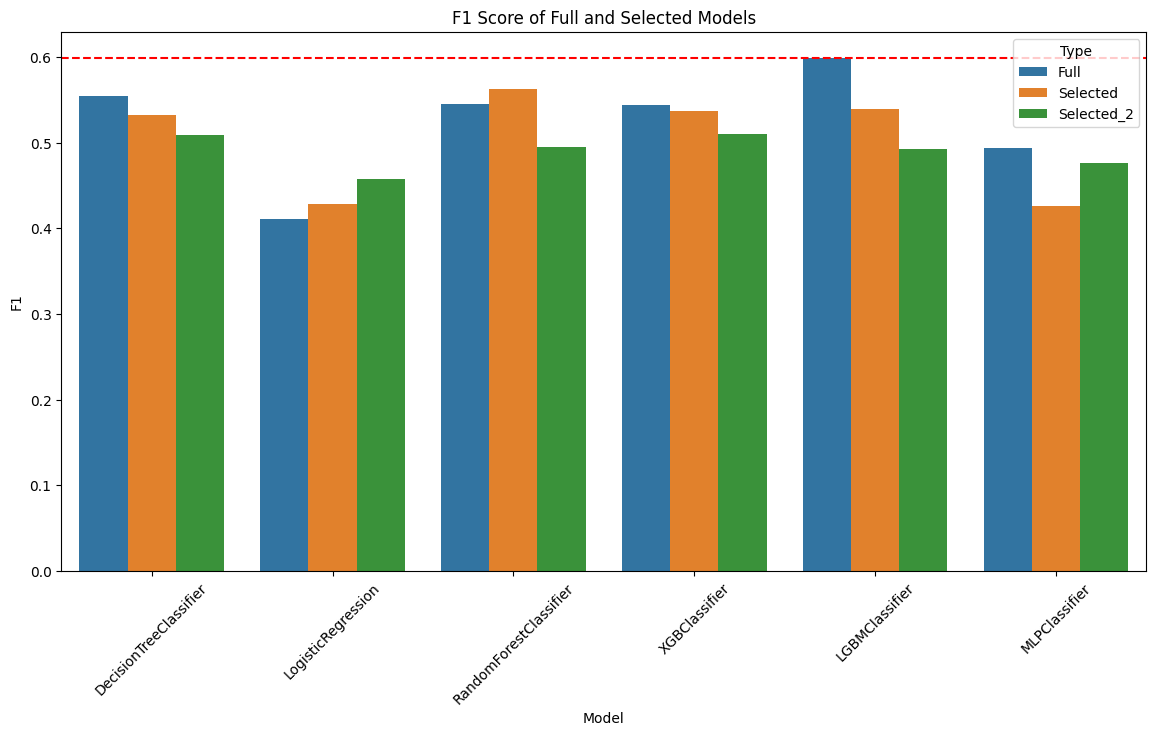

In [ ]:
model_full = pd.DataFrame(model_full, columns=['Model', 'Accuracy', 'F1'])
model_selected = pd.DataFrame(model_selected, columns=['Model', 'Accuracy', 'F1'])
model_selected_2 = pd.DataFrame(model_selected_2, columns=['Model', 'Accuracy', 'F1'])

import seaborn as sns

import matplotlib.pyplot as plt

# Combine the dataframes for full and selected models
model_full['Type'] = 'Full'
model_selected['Type'] = 'Selected'
model_selected_2['Type'] = 'Selected_2' 
combined_df = pd.concat([model_full, model_selected])
combined_df = pd.concat([combined_df, model_selected_2])

model_full



# Plot the F1 score
plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='F1', hue='Type', data=combined_df)
plt.title('F1 Score of Full and Selected Models')
plt.axhline(combined_df['F1'].max(), color='red', linestyle='--')
plt.xticks(rotation=45)
plt.show()

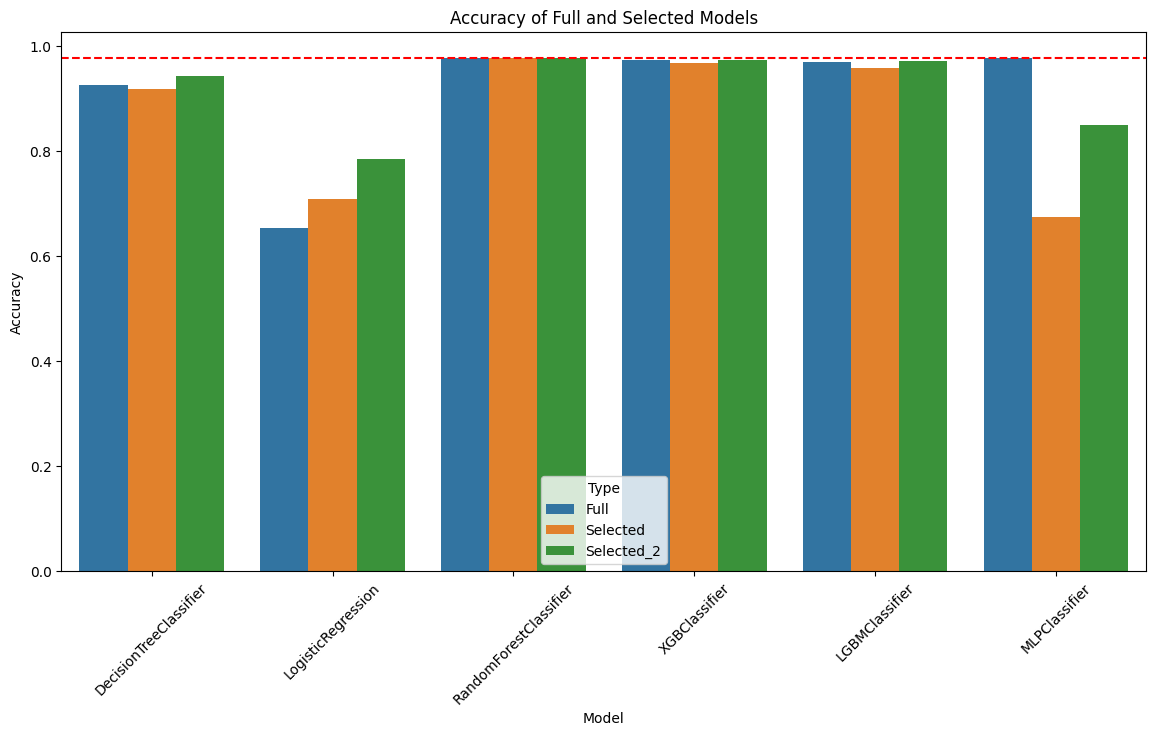

<Axes: xlabel='Model', ylabel='value'>

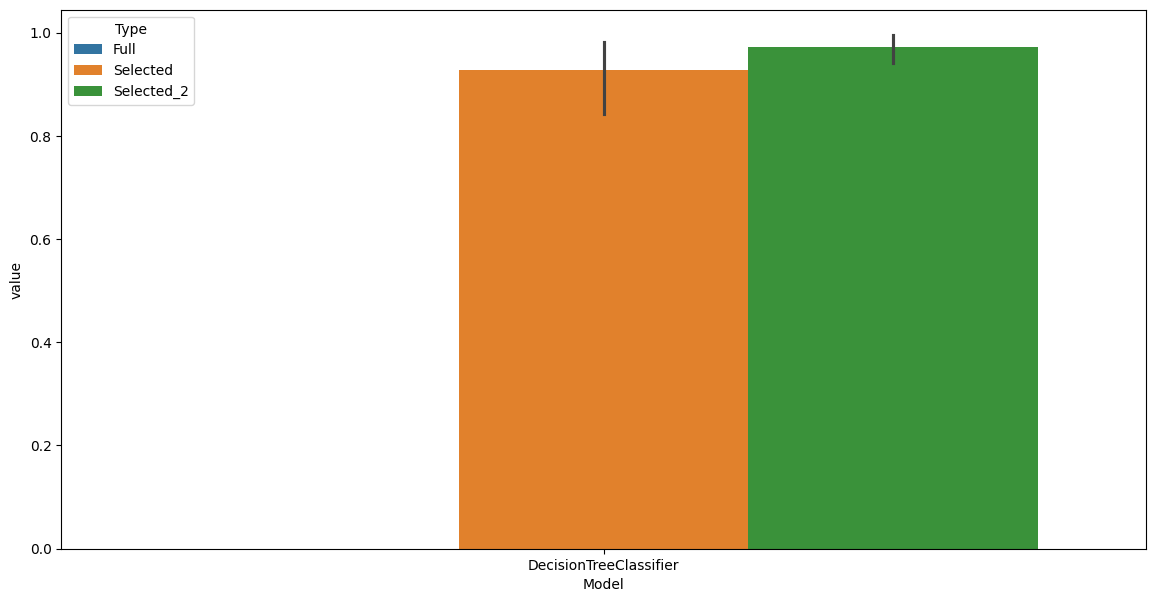

In [ ]:
# plotting the results
model_full_df = pd.DataFrame(model_full, columns=['Model', 'Accuracy', 'F1_full'])
model_selected_df = pd.DataFrame(model_selected, columns=['Model', 'Accuracy', 'F1_selected'])
model_selected_2_df = pd.DataFrame(model_selected_2, columns=['Model', 'Accuracy', 'F1_selected_2'])

model_full_df['Type'] = 'Full'
model_selected_df['Type'] = 'Selected'
model_selected_2_df['Type'] = 'Selected_2'

model_full_cmax_df = pd.DataFrame(model_full_cmax, columns=['Model', 'Cmaxl'])
model_selected_cmax_df = pd.DataFrame(model_selected_cmax, columns=['Model', 'Cmax'])
model_selected_2_cmax_df = pd.DataFrame(model_selected_2_cmax, columns=['Model', 'Cmax'])

model_full_cmax_df['Type'] = 'Full'
model_selected_cmax_df['Type'] = 'Selected'
model_selected_2_cmax_df['Type'] = 'Selected_2'



concatenated_df = pd.concat([model_full_df, model_selected_df, model_selected_2_df], axis=0)
concatenated_cmax_df = pd.concat([model_full_cmax_df, model_selected_cmax_df, model_selected_2_cmax_df], axis=0)

# Plot the accuracy
plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='Accuracy', hue='Type', data=concatenated_df)
plt.title('Accuracy of Full and Selected Models')
# horizontal line at maximum accuracy
plt.axhline(combined_df['Accuracy'].max(), color='red', linestyle='--')
plt.xticks(rotation=45)
plt.show()

# Melt the concatenated_cmax_df to have a single 'Cmax' column
concatenated_cmax_df = concatenated_cmax_df.melt(id_vars=['Model', 'Type'], value_vars=['Cmax'])

# Plot the Cmax
plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='value', hue='Type', data=concatenated_cmax_df)







In [ ]:
concatenated_cmax_df

,Model,Type,Cmax_Type,Cmax
0,DecisionTreeClassifier,Full,Cmax_full,0.941266
1,DecisionTreeClassifier,Full,Cmax_full,0.941266
2,DecisionTreeClassifier,Full,Cmax_full,0.999439
3,DecisionTreeClassifier,Full,Cmax_full,0.995644
4,DecisionTreeClassifier,Full,Cmax_full,0.987699
...,...,...,...,...
58,DecisionTreeClassifier,Selected_2,Cmax_selected_2,0.999982
59,DecisionTreeClassifier,Selected_2,Cmax_selected_2,0.995146
60,DecisionTreeClassifier,Selected_2,Cmax_selected_2,0.999606
61,DecisionTreeClassifier,Selected_2,Cmax_selected_2,0.999606


# 